# Analiza podatkov

V tej datoteki bom analizirala podatke o novo predvajanih anime TV-serijah vsake sezone zadnjih 50 let (od sezone Winter 1974 do Fall 2024), pridobljene s spletne strani myanimelist.net.

Analiza vključuje naslednja podpoglavja:
- Splošna analiza, povprečne ocene in razširjenost
- Primerjave števila vnosov po letih oz. petletjih glede na demografike in vire s člani ter ocenami
- Analiza žanrov
- Primerjava podatkov o anime studiih
- Liki in favoritizacije
- Franšize

### Razlaga nekaterih pojmov

**Sezona in leto premiere**: Koledarsko leto se deli na 4 anime sezone: Winter, Spring, Summer, Fall. Vsako sezono izidejo novi naslovi TV-serij, filmov in drugih oblik anime-jev, nadaljujejo pa se tudi stare serije, ki se še niso zaključile.

**Vir**: Anime TV-adaptacija lahko temelji na originalni mangi, na t. i. Light Novel-u, lahko je zgodba povsem originalna, lahko pa temelji še na zelo različnih drugih virih.

**Člani**: myanimelist.net beleži število registriranih uporabnikov, ki imajo posamezen anime nekje na svojem anime seznamu ("anime list"), bodisi v razdelku "Watching" ali "Completed", bodisi v razdelku "Plan to Watch", "On-hold" ali "Dropped". S številom "članov" se tako meri razširjenost oz. "popularnost" anime-ja.

**Demografika**: T. i. "Demographic" pravzaprav pomeni ciljno občinstvo nekega anime-ja, ki pa je lahko: Shounen (mladi fantje), Shoujo (mlada dekleta), Seinen (mladi moški), Josei (mlade ženske), Kids (otroci). "NG" stoji za "Not given".

**Favoritizacije**: Anime, manga in liki so na spletni strani myanimelist.net lahko tudi "favoritizirani", kar pomeni, da jih registriran uporabnik doda na seznam svojih (do 10) najljubših.

**Povezani vnosi**: Mednje sodijo predzgodbe, nadaljevanja in spin-off naslovi nekega anime-ja oziroma mange, torej deli isti zgodbe ali vsaj **franšize**, kot sem jih poimenovala v tej datoteki.

**Glavni liki**: Na prvi strani posameznega anime-ja je izpostavljenih tudi do 10 likov, ki nastopajo v seriji.

### Priprava

Najprej sem uvozila  podatke iz pridobljenih CSV-tabel in potrebna paketa. V *anime.csv* so shranjeni podrobnejši podatki s strani posameznega anime-ja, vendar imam zaradi ponavljajoče se napake 405 od nekod dalje v tej tabeli premalo podatkov za analizo. Zato sem se bolj osredotočila na malo okrnjen nabor podatkov o anime-jih, zbranih s strani vseh vnosov v bazo posamezne sezone. Ti so zbrani v *vsi_anime.csv*, ki vsebuje vse nove anime TV-serije z nekaj njihovimi atributi. Namen tabele *liki.csv* je bil zbrati še podatek o favoritizaciji likov, vendar ta temelji na enakem pridobivanju podatkov kot *anime.csv*, poleg tega pa je bilo potrebno pridobiti še nove spletne strani, zato je količina podatkov izredno okrnjena in manj uporabna, saj so vključeni liki predvsem iz starejših serij, razmah te prakse in popularnejših likov pa se je zgodil v modernejšem času. Podobno velja za franšize, saj so povezani vnosi atribut, ki ga ni med splošnimi podatki.

Ostale tabele,*anime_zanri.csv*, *anime_liki.csv* in *anime_fransize.csv*, so povezovalne.

Analizo sem torej osredotočila na *vsi_anime.csv*, a sem naredila nekaj analize tudi za ostale podatke, ki pa bo sicer bolj (oz. sploh) zanimiva, če vam, uporabnik, pridobivanje vseh spletnih strani ni delalo težav. V tem primeru predlagam, da si te datoteke ne le ogledate, ampak vso kodo tudi poženete znova.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 10)

%matplotlib inline 

ANIME = pd.read_csv("anime.csv", index_col="id") 
VSI_ANIME = pd.read_csv("vsi_anime.csv", index_col="id")
LIKI = pd.read_csv("liki.csv", index_col="id_lika")
ZANRI = pd.read_csv("anime_zanri.csv")
ANIME_LIKI = pd.read_csv("anime_liki.csv")
FRANSIZE = pd.read_csv("anime_fransize.csv")

## Splošna analiza, povprečne ocene in razširjenost

Za začetek naj predstavim tabelo, s katero bom delala večino te analize.

In [2]:
VSI_ANIME

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
3579,Getter Robo,51,spring,1974,Manga,25,6.70,8804,Shounen,['Mecha'],"['Action', 'Sci-Fi']",['Toei Animation']
6383,Chargeman Ken!,65,spring,1974,Original,6,4.56,4518,NG,[],"['Action', 'Adventure', 'Sci-Fi']",['Knack Productions']
3388,Majokko Megu-chan,72,spring,1974,Original,25,6.67,4010,NG,['Mahou Shoujo'],[],['Toei Animation']
2836,Chiisana Viking Vickie,78,spring,1974,Novel,24,6.67,3948,Kids,['Historical'],"['Adventure', 'Comedy']",['Nippon Animation']
8139,Shin Minashigo Hutch,26,spring,1974,NaN,24,6.27,1542,NG,[],"['Adventure', 'Comedy', 'Drama']",['Tatsunoko Production']
...,...,...,...,...,...,...,...,...,...,...,...,...
59505,Kankin Kuiki Level X,NG,fall,2024,Web manga,NG,NaN,272,NG,[],"['Horror', 'Mystery']",[]
59499,Asatir 2: Mirai no Mukashi Banashi,NG,fall,2024,Original,NG,NaN,191,NG,[],['Adventure'],[]
58827,Okaimono Panda!,NG,fall,2024,Other,NG,NaN,117,NG,['Anthropomorphic'],[],['Shin-Ei Animation']


In [5]:
print(float(VSI_ANIME["ocena"].mean()))

6.854301446771755


Povprečna ocena je torej približno 6.85, ker pa me je zanimalo več, sem prefiltrirala vnose, za katere ocena ni bila znana, pri tem pa je vzorec ostal reprezentativen. V to tabelo sem nato vnesla nov stolpec "zaokrožena ocena", v katerem so ocene zaokrožene na eno decimalko.

In [3]:
filter_nan = VSI_ANIME["ocena"].notna()
ocene = VSI_ANIME[filter_nan]
print(sum(filter_nan))

4631


In [4]:
def zaokrozi(x):
    return round(x, 1)

zaokrozena_ocena = ocene["ocena"].apply(zaokrozi)

podtabela = ocene[["naslov", "leto premiere", "ocena"]].copy()
podtabela["zaokrožena ocena"] = zaokrozena_ocena
podtabela

,naslov,leto premiere,ocena,zaokrožena ocena
id,,,,
3579,Getter Robo,1974,6.70,6.7
6383,Chargeman Ken!,1974,4.56,4.6
3388,Majokko Megu-chan,1974,6.67,6.7
2836,Chiisana Viking Vickie,1974,6.67,6.7
8139,Shin Minashigo Hutch,1974,6.27,6.3
...,...,...,...,...
56189,Grendizer U,2024,6.05,6.0
54730,Kinnikuman: Kanpeki Chоujin Shiso-hen,2024,6.59,6.6
59010,Yami Shibai 13,2024,5.97,6.0


Vnose sem tako lahko združila po zaokroženi oceni in predstavila razporeditev posameznih ocen.

In [6]:
po_ocenah = podtabela.groupby("zaokrožena ocena").size()
po_ocenah

zaokrožena ocena
2.9     1
3.0     1
3.3     4
3.8     3
3.9     2
       ..
8.8    15
8.9     7
9.0     7
9.1     4
9.3     1
Length: 56, dtype: int64

<Axes: title={'center': 'Razporeditev zaokroženih ocen'}, xlabel='zaokrožena ocena', ylabel='število animejev'>

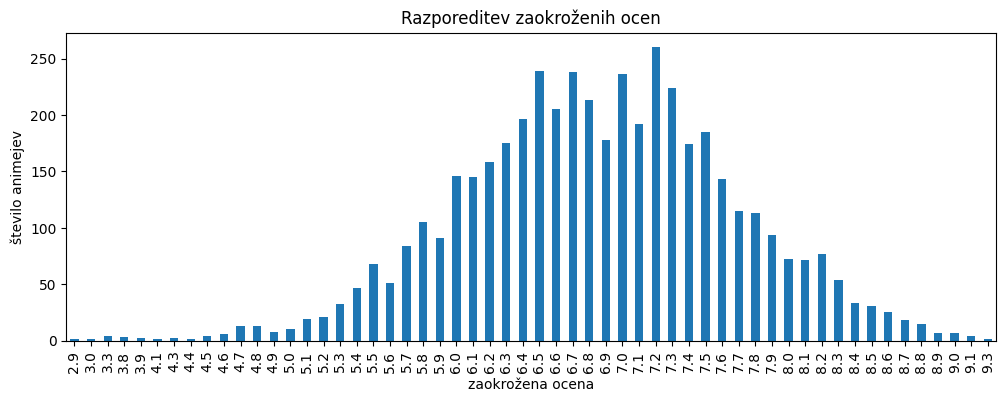

In [7]:
po_ocenah.plot.bar(title="Razporeditev zaokroženih ocen", xlabel= "zaokrožena ocena", ylabel="število animejev", figsize=(12, 4))

Zanimalo me je, ali obstaja kakšen trend v "kakovosti" anime-jev (do te mere, kolikor se to izraža z oceno) skozi čas, zato sem naredila graf spreminjanja povprečne ocene posameznega leta, torej vseh vnosov vseh sezon v letu.

<Axes: title={'center': 'Povprečna ocena po letih'}, xlabel='leto premiere', ylabel='povprečna ocena'>

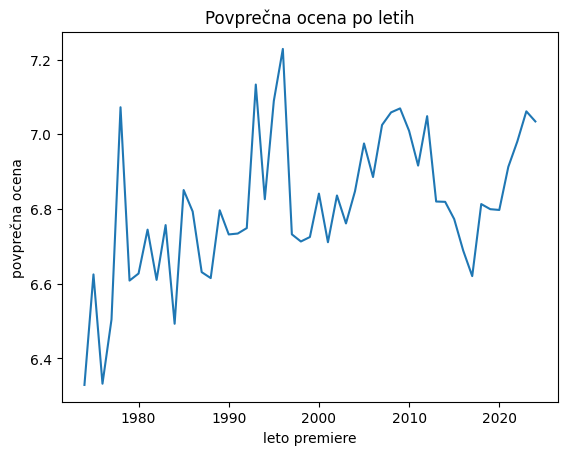

In [5]:
ocene_po_letih = ocene.groupby("leto premiere")["ocena"].mean()
ocene_po_letih.plot(title="Povprečna ocena po letih", xlabel="leto premiere", ylabel="povprečna ocena")

V grafu je prisoten le manjši trend navzgor, zato sem si ogledala še nekatere ekstreme: deset najslabše in najbolje ocenjenih let.

In [161]:
ocene_po_letih.sort_values(ascending=False).tail(10)

leto premiere
1980    6.627083
1975    6.624706
2017    6.620093
1988    6.614839
1982    6.610000
1979    6.608182
1977    6.504000
1984    6.492500
1976    6.332000
1974    6.328750
Name: ocena, dtype: float64

In [168]:
ocene_po_letih.sort_values(ascending=False).head(10)

leto premiere
1996    7.228529
1993    7.133158
1995    7.089394
1978    7.072353
2009    7.069280
2023    7.061389
2008    7.058593
2012    7.048456
2024    7.034331
2007    7.024815
Name: ocena, dtype: float64

Med najslabše povprečno ocenjenimi leti se z izjemo leta 2017 po pričakovanju pojavijo predvsem starejše sezone - pred letom 1990. Takrat niti ni bilo veliko novih naslovov, anime-ji pa so bili manjše kvalitete, kot jih lahko poznamo danes. Zato me je zanimalo, kaj se je "dogajalo" leta 2017: kateri anime-ji so bili predvajani, kaj je bilo morda drugače kot pri letih z najboljšo povprečno oceno, ki jih je prikazala druga tabelica.

In [164]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 2017].sort_values("ocena", ascending=False).head(10)

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
34096,Gintama.,12,winter,2017,Manga,24,8.98,318344,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Bandai Namco Pictures']
35180,3-gatsu no Lion 2nd Season,22,fall,2017,Manga,25,8.92,406314,Seinen,"['Childcare', 'Strategy Game']",['Drama'],['Shaft']
33095,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...,12,winter,2017,Manga,24,8.71,189304,Josei,"['Adult Cast', 'Historical', 'Love Polygon', '...",['Drama'],['Studio Deen']
34599,Made in Abyss,13,summer,2017,Web manga,25,8.64,1400138,NG,['Gore'],"['Adventure', 'Drama', 'Fantasy', 'Mystery', '...",['Kinema Citrus']
34591,Natsume Yuujinchou Roku,11,spring,2017,Manga,23,8.61,188503,Shoujo,"['Iyashikei', 'Mythology']","['Slice of Life', 'Supernatural']",['Shuka']
25777,Shingeki no Kyojin Season 2,12,spring,2017,Manga,24,8.52,2753457,Shounen,"['Gore', 'Military', 'Survival']","['Action', 'Drama', 'Suspense']",['Wit Studio']
35843,Gintama.: Porori-hen,13,fall,2017,Manga,23,8.52,204226,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Bandai Namco Pictures']
35557,Houseki no Kuni,12,fall,2017,Manga,24,8.39,468429,Seinen,['Anthropomorphic'],"['Action', 'Drama', 'Fantasy', 'Mystery']",['Orange']
32937,Kono Subarashii Sekai ni Shukufuku wo! 2,10,winter,2017,Light novel,23,8.25,1534402,NG,"['Isekai', 'Parody']","['Adventure', 'Comedy', 'Fantasy']",['Studio Deen']


Ocene najboljših vnosov leta 2017 so zelo visoke, naslovi sotudi zelo znani in večina prikazanih serij sodi med zelo razširjene in priljubljene naslove, ter predvsem med anime-je, prepoznane kot dobre. Sledi primerjava vnosov po demografikah in žanrih.

In [166]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 2017].groupby("demografika").size().sort_values(ascending=False)

demografika
NG         163
Kids        55
Shounen     31
Seinen      18
Josei        4
Shoujo       4
dtype: int64

In [175]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 2024].groupby("demografika").size().sort_values(ascending=False)

demografika
NG         160
Shounen     47
Seinen      19
Kids        10
Shoujo       9
Josei        2
dtype: int64

In [179]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 2017].groupby("žanri").size().sort_values(ascending=False).head(10)

žanri
['Comedy']                            36
[]                                    25
['Action', 'Sci-Fi']                  11
['Action', 'Adventure', 'Fantasy']     9
['Action']                             9
['Comedy', 'Slice of Life']            8
['Comedy', 'Fantasy']                  8
['Slice of Life']                      8
['Action', 'Fantasy']                  7
['Fantasy']                            6
dtype: int64

In [178]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 2024].groupby("žanri").size().sort_values(ascending=False).head(10)

žanri
['Action', 'Adventure', 'Fantasy']    30
['Comedy']                            20
['Action']                            12
[]                                    12
['Action', 'Fantasy']                 11
['Comedy', 'Romance']                 10
['Action', 'Sci-Fi']                   7
['Adventure', 'Fantasy']               7
['Comedy', 'Fantasy']                  6
['Romance']                            6
dtype: int64

Očitno je bilo leta 2024 v primerjavi z letom 2017 več anime-jev, katerih ciljna publika so mladi in odrasli fantje oz. moški, precej manj pa je naslovov, ki ciljajo na otroško občinstvo. Leta 2017 je več komedij in manj akcij in fantazijskih anime-jev kot leta 2024.

In [170]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 1996].groupby("demografika").size().sort_values(ascending=False)

demografika
NG         18
Shounen     9
Shoujo      5
Kids        2
Josei       1
Seinen      1
dtype: int64

Zadnja tabela predstavlja leto 1996, kjer grah povprečnih ocen doseže svojo najvišjo točko. Tabela je ilustracija razlike v količini novih naslovov v letu, v primerjavi s poznejšimi leti, kot sta 2017 in 2024. V modernejših časih je proizvedenih več anime-jev, kar pa seveda pomeni, da je proizvedenih tudi več "slabših" anime-jev, ki nižajo povprečno oceno. To je razvidno tudi iz spodnje tabele, ki prikazuje deset najbolje ocenjenih naslovov leta 1996, izmed katerih je štirje presežejo oceno osem, poleg tega pa so povprečno manj znani oz. razširjeni kot tisti iz leta 2017, ki so prikazani zgoraj.

In [174]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 1996].sort_values("ocena", ascending=False).head(10)

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
45,Rurouni Kenshin: Meiji Kenkaku Romantan,94,winter,1996,Manga,25,8.28,499430,Shounen,"['Historical', 'Samurai']","['Action', 'Comedy', 'Romance']",[]
235,Meitantei Conan,NG,winter,1996,Manga,NG,8.17,352257,Shounen,['Detective'],"['Adventure', 'Comedy', 'Mystery']",['TMS Entertainment']
1486,Kodomo no Omocha (TV),102,spring,1996,Manga,24,8.05,70278,Shoujo,"['Love Polygon', 'Showbiz']","['Comedy', 'Drama', 'Romance']",['Gallop']
535,Slayers Next,26,spring,1996,Light novel,24,8.01,71637,NG,[],"['Action', 'Adventure', 'Comedy', 'Fantasy']",['E&amp;G Films']
996,Bishoujo Senshi Sailor Moon: Sailor Stars,34,spring,1996,Manga,24,7.95,115090,Shoujo,['Mahou Shoujo'],"['Adventure', 'Comedy', 'Drama', 'Fantasy', 'R...",['Toei Animation']
2829,Ie Naki Ko Remy,23,fall,1996,Novel,23,7.90,21423,NG,['Historical'],"['Adventure', 'Drama']",['Nippon Animation']
1485,Akachan to Boku,35,summer,1996,Manga,25,7.82,23671,Shoujo,['Childcare'],"['Comedy', 'Drama']",['Pierrot']
3545,Kochira Katsushikaku Kameari Kouenmae Hashutsujo,373,summer,1996,Manga,25,7.77,19505,Shounen,"['Adult Cast', 'Detective', 'Gag Humor']",['Comedy'],['Gallop']
182,Tenkuu no Escaflowne,26,spring,1996,Original,24,7.66,161703,NG,"['Isekai', 'Love Polygon', 'Mecha', 'Psycholog...","['Action', 'Adventure', 'Fantasy', 'Romance', ...",['Sunrise']


Za občutek in zanimivost sledita tabeli najbolje ocenjenih in najpopularnejših (z največ člani) anime-jev.

In [6]:
najboljsi = ocene.sort_values("ocena", ascending=False)
najboljsi.head(10)

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
52991,Sousou no Frieren,28,fall,2023,Manga,24,9.34,817774,Shounen,[],"['Adventure', 'Drama', 'Fantasy']",['Madhouse']
5114,Fullmetal Alchemist: Brotherhood,64,spring,2009,Manga,24,9.09,3381374,Shounen,['Military'],"['Action', 'Adventure', 'Drama', 'Fantasy']",['Bones']
9253,Steins;Gate,24,spring,2011,Visual novel,24,9.07,2590030,NG,"['Psychological', 'Time Travel']","['Drama', 'Sci-Fi', 'Suspense']",['White Fox']
28977,Gintama°,51,spring,2015,Manga,24,9.06,638181,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Bandai Namco Pictures']
38524,Shingeki no Kyojin Season 3 Part 2,10,spring,2019,Manga,23,9.05,2312316,Shounen,"['Gore', 'Military', 'Survival']","['Action', 'Drama', 'Suspense']",['Wit Studio']
9969,Gintama&#039;,51,spring,2011,Manga,24,9.03,562830,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Sunrise']
11061,Hunter x Hunter (2011),148,fall,2011,Manga,23,9.03,2872330,Shounen,[],"['Action', 'Adventure', 'Fantasy']",['Madhouse']
15417,Gintama&#039;: Enchousen,13,fall,2012,Manga,24,9.02,328844,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Sunrise']
41467,Bleach: Sennen Kessen-hen,13,fall,2022,Manga,24,9.01,558114,Shounen,[],"['Action', 'Adventure', 'Fantasy']",['Pierrot']


In [7]:
najpopularnejsi = VSI_ANIME.sort_values("člani", ascending=False)
najpopularnejsi.head(10)

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
16498,Shingeki no Kyojin,25,spring,2013,Manga,24,8.55,3990574,Shounen,"['Gore', 'Military', 'Survival']","['Action', 'Award Winning', 'Drama', 'Suspense']",['Wit Studio']
1535,Death Note,37,fall,2006,Manga,23,8.62,3944392,Shounen,['Psychological'],"['Supernatural', 'Suspense']",['Madhouse']
5114,Fullmetal Alchemist: Brotherhood,64,spring,2009,Manga,24,9.09,3381374,Shounen,['Military'],"['Action', 'Adventure', 'Drama', 'Fantasy']",['Bones']
30276,One Punch Man,12,fall,2015,Web manga,24,8.49,3254079,Seinen,"['Adult Cast', 'Parody', 'Super Power']","['Action', 'Comedy']",['Madhouse']
11757,Sword Art Online,25,summer,2012,Light novel,23,7.21,3099024,NG,"['Love Polygon', 'Video Game']","['Action', 'Adventure', 'Fantasy', 'Romance']",['A-1 Pictures']
38000,Kimetsu no Yaiba,26,spring,2019,Manga,23,8.46,3080000,Shounen,['Historical'],"['Action', 'Award Winning', 'Fantasy']",['ufotable']
31964,Boku no Hero Academia,13,spring,2016,Manga,24,7.86,3054962,Shounen,"['School', 'Super Power']",['Action'],['Bones']
20,Naruto,220,fall,2002,Manga,23,8.00,2881809,Shounen,['Martial Arts'],"['Action', 'Adventure', 'Fantasy']",['Pierrot']
11061,Hunter x Hunter (2011),148,fall,2011,Manga,23,9.03,2872330,Shounen,[],"['Action', 'Adventure', 'Fantasy']",['Madhouse']


Kot zanimivost pa me je zanimalo tudi, katera sezona (t.j. leto z "letnim časom") je prinesla povprečno najbolje ocenjene anime-je.

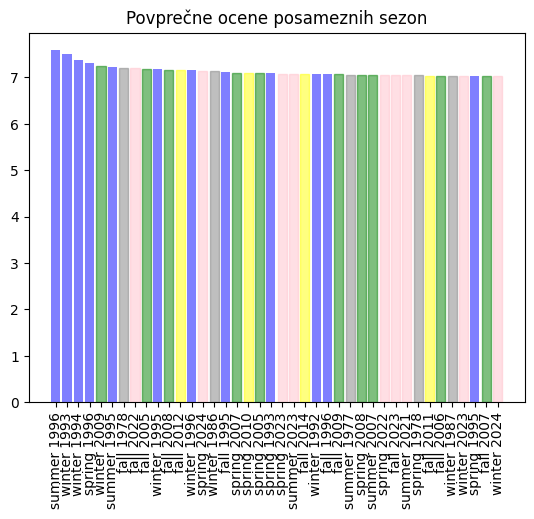

In [8]:
podtabela_sezone = VSI_ANIME[["sezona premiere", "leto premiere", "ocena", "člani"]].copy()
podtabela_sezone["sezona"] = podtabela_sezone["sezona premiere"] + ' ' + podtabela_sezone["leto premiere"].apply(str)

def plot_color_sezone(data):
    bars = plt.bar(x=data.index, height=data.ocena, color='blue', alpha=0.5)
    for idx, sezona in enumerate(data.index):
        sez, leto = sezona.split()
        if int(leto) < 1990:
            bars[idx].set_color(c="grey")
        if 2010 > int(leto) >= 2000:
            bars[idx].set_color(c='green')
        if 2020 > int(leto) >= 2010:
            bars[idx].set_color(c="yellow")
        if int(leto) >= 2020:
            bars[idx].set_color(c="pink")
    plt.xticks(rotation = 90)
    plt.title("Povprečne ocene posameznih sezon")

df_sezone = pd.DataFrame({
    "ocena": podtabela_sezone.groupby("sezona")["ocena"].mean().sort_values(ascending=False).head(40)
})

plot_color_sezone(df_sezone)

Opazimo lahko, da so "najboljše" štiri sezone izpred leta 2000, med najbolje povprečno ocenjenimi desetimi pa je le ena sezona iz zadnjega petletja. S preostalim štetjem in opazovanjem pa se lahko poigrate sami :)

V okviru splošne analize sem si pogledala še razpršeni graf korelacije med številom članov in oceno anime-ja in poiskala nekatere meni zanimive ekstremne točke: zelo razširjeni anime-ji z izrazito nizkimi ocenami, ki so se vsi izkazali za zelo znane naslove - ki so znano razočarali ali pa so označeni za slabše, ter splošno najslabše ocenjeni anime-ji.

<Axes: title={'center': 'Razporeditev ocen glede na člane'}, xlabel='člani', ylabel='ocena'>

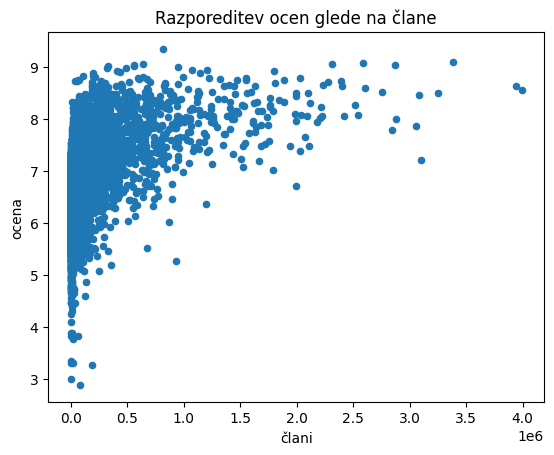

In [44]:
VSI_ANIME.plot.scatter(x="člani", y="ocena", title="Razporeditev ocen glede na člane")

In [40]:
VSI_ANIME[(VSI_ANIME["ocena"] < 6) & (VSI_ANIME["člani"] > 800000)]

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
39617,Yakusoku no Neverland 2nd Season,11,winter,2021,Manga,22,5.27,934160,Shounen,"['Psychological', 'Survival']","['Fantasy', 'Sci-Fi', 'Suspense']",['CloverWorks']


In [41]:
VSI_ANIME[(VSI_ANIME["ocena"] < 7) & (VSI_ANIME["člani"] > 1800000)]

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
21881,Sword Art Online II,24,summer,2014,Light novel,23,6.71,1993099,NG,"['Love Polygon', 'Video Game']","['Action', 'Adventure', 'Fantasy', 'Romance']",['A-1 Pictures']


In [42]:
VSI_ANIME[(VSI_ANIME["ocena"] < 7.5) & (VSI_ANIME["člani"] > 3000000)]

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
11757,Sword Art Online,25,summer,2012,Light novel,23,7.21,3099024,NG,"['Love Polygon', 'Video Game']","['Action', 'Adventure', 'Fantasy', 'Romance']",['A-1 Pictures']


In [43]:
najboljsi.tail(5)

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
28929,Vampire Holmes,12,spring,2015,Game,3,3.31,21264,NG,[],"['Comedy', 'Mystery', 'Supernatural']",['Studio! Cucuri']
34223,Forest Fairy Five,13,winter,2017,Picture book,10,3.31,3832,NG,['Music'],"['Comedy', 'Fantasy']",[]
19315,Pupa,12,winter,2014,Manga,4,3.28,190769,NG,"['Gore', 'Psychological']","['Fantasy', 'Horror', 'Suspense']",['Studio Deen']
37448,Ladyspo,12,spring,2018,Original,4,3.01,4576,NG,['Team Sports'],"['Comedy', 'Sci-Fi', 'Sports']",['Brio Animation']
38853,Ex-Arm,12,winter,2021,Manga,23,2.89,82145,Seinen,[],"['Action', 'Sci-Fi']",['Visual Flight']


Ogledala sem si tudi razporeditev ocen glede na leto premiere, iz kjer je razvidno, da se je skozi čas višala najvišja ocena in število anime-jev, ki dosegajo visoke ocene, a prav tako so novejši časi tisti, ki so prvi zares prinesli anime-je z ocenami pod 5 in celo 4.

<Axes: title={'center': 'Razporeditev ocen po letih'}, xlabel='leto premiere', ylabel='ocena'>

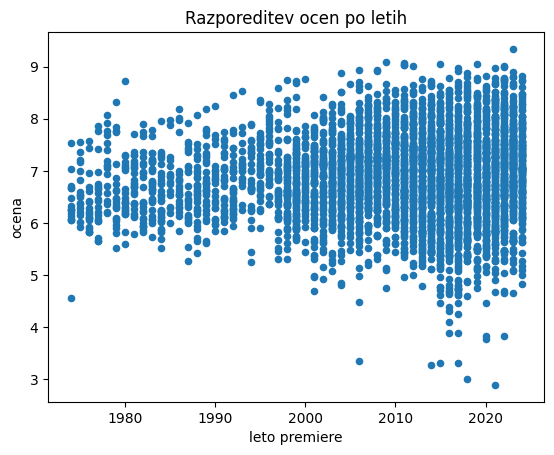

In [46]:
VSI_ANIME.plot.scatter(x="leto premiere", y="ocena", title="Razporeditev ocen po letih")

Za konec najgrobje analize pa naj sledi graf razširjenosti anime-jev iz posameznih let, torej graf skupnega števila članov anime-jev, seštetega posebej za vnose vsakega koledarskega leta:

<Axes: title={'center': 'Razširjenost anime-jev iz posameznih let'}, xlabel='leto premiere', ylabel='skupni člani'>

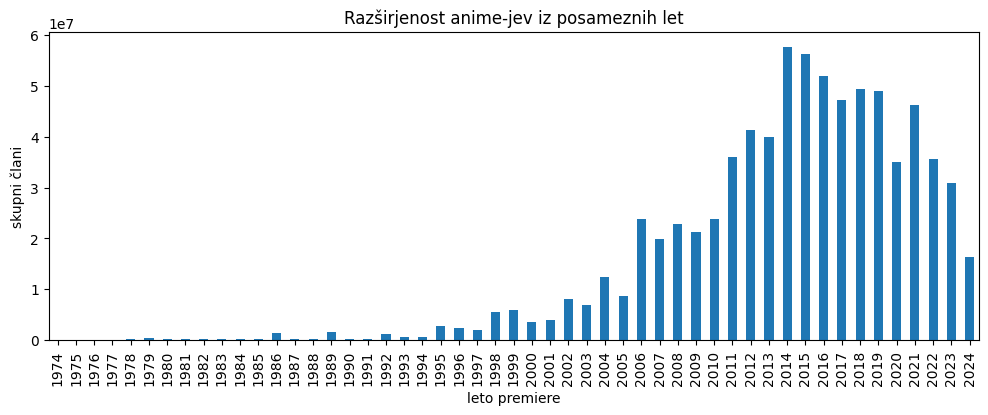

In [48]:
VSI_ANIME.groupby("leto premiere")["člani"].sum().plot.bar(title="Razširjenost anime-jev iz posameznih let", xlabel= "leto premiere", ylabel="skupni člani", figsize=(12, 4))

## Primerjave števila vnosov po letih oz. petletjih glede na demografike in vire s člani ter ocenami

Za nadaljevanje analize sem se odločila, da leta razdelim na posamezna petletja, ki sem jih dodala v uporabljeno podtabelo.

In [9]:
podtabela_po_letih = VSI_ANIME[["naslov", "leto premiere", "ocena", "demografika", "člani", "vir"]].copy()

def petletje(x):
    if x % 10 >= 5:
        return (x // 10) * 10 + 5
    return (x // 10) * 10

podtabela_po_letih["petletja"] = podtabela_po_letih["leto premiere"].apply(petletje)

Čeprav veliko vnosov nima podane demografike, se iz spodnjega grafa razbere najprej, kako je rasla industrija, ter v kakšen (približnem) razmerju so posamezne demografike zastopane: Največ jih cilja na mlade fante, mlade moške in otroke, občutno manj pa je anime-jev "za" mlada dekleta in ženske, ki seveda gledajo serije "za fante". Slednje so navadno akcijske avanture, ki vključujejo protagonistovo bojevanje s pošastmi oziroma zlimi silami, in so zelo zastopan in razširjen žanr - v to kategorijo so vključeni nekateri najbolj znani in tudi širše, "zahodno" razpoznavni in gledani naslovi, t. i. Long Action Shounen-i, kot so One Piece, Naruto, Bleach ipd.

<Axes: title={'center': 'Število vnosov posameznih demografik po petletjih'}, xlabel='začetek petletja'>

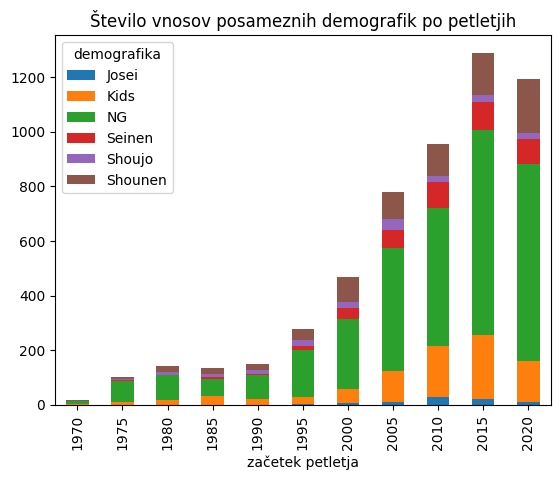

In [10]:
petletni_podatki = pd.crosstab(
    index = podtabela_po_letih["petletja"],
    columns = podtabela_po_letih["demografika"]
)
petletni_podatki.plot(kind = "bar", stacked = True, title="Število vnosov posameznih demografik po petletjih", xlabel="začetek petletja")

demografika
Kids       6.291492
NG         6.717243
Josei      7.030000
Seinen     7.207146
Shoujo     7.275372
Shounen    7.304505
Name: ocena, dtype: float64


<Axes: title={'center': 'Povprečna ocena po demografikah'}, xlabel='demografika'>

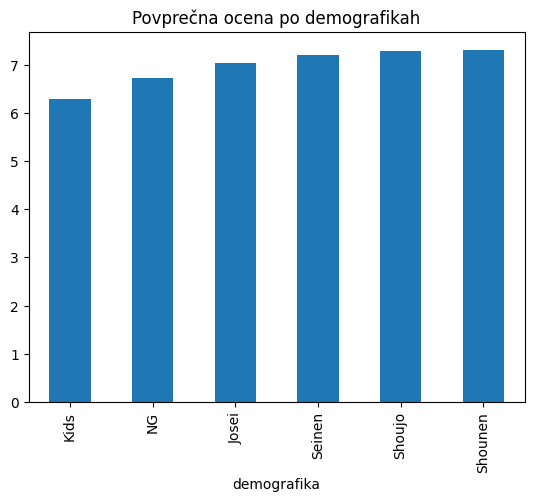

In [14]:
print(podtabela_po_letih.groupby("demografika")["ocena"].mean().sort_values())
podtabela_po_letih.groupby("demografika")["ocena"].mean().sort_values().plot.bar(title="Povprečna ocena po demografikah")

Primerjava povprečnih ocen nam pokaže, da so povprečno najbolje ocenjeni anime-ji demografike Shounen, sledi Shoujo, torej naslovi za mlade fante in dekleta. Kmalu sledijo Seinen anime-ji, nato Josei, najslabše ocenjeni pa so "Kids" anime-ji. Namenoma nisem izključila "Not Given" vnosov.

Sledi ogled števila anime-jev, članov in povprečne ocene v istem grafu, od koder lahko vidimo, kako je pač Shounen daleč najbolj popularen in razširjen, sledi mu šele Seinen. Razmerje med številom serij in številom članov pa je obrnjeno le pri Kids anime-jih, ki jih je očitno zelo veliko glede na to, koliko ljudi jih gleda, kar pa tudi ne bi smelo biti presenetljivo.

             število * 100  člani * 10**7  povprečna ocena
demografika                                               
Josei                 0.78       0.881805         7.030000
Kids                  8.43       0.428274         6.291492
Seinen                4.32       8.938597         7.207146
Shoujo                1.93       3.129173         7.275372
Shounen               7.70      25.345100         7.304505


<Axes: title={'center': 'Število, člani in povprečna ocena po demografikah'}, xlabel='demografika'>

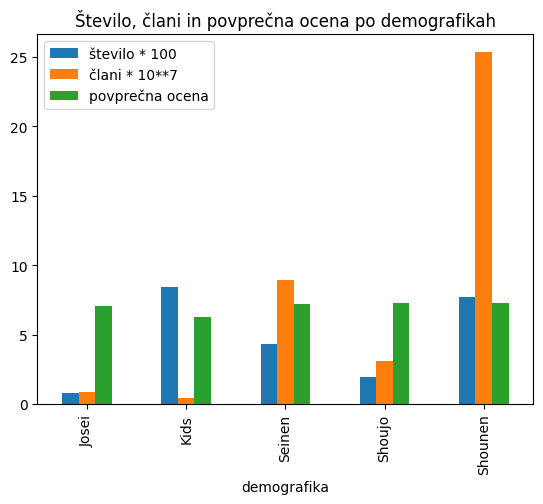

In [11]:
filter_demo = podtabela_po_letih["demografika"] != "NG"
podtabela_demo = podtabela_po_letih[filter_demo]

df_demo = pd.DataFrame({"število * 100": podtabela_demo.groupby("demografika").size() / 100,
                         "člani * 10**7": podtabela_demo.groupby("demografika")["člani"].sum() / 10000000, 
                         "povprečna ocena": podtabela_demo.groupby("demografika")["ocena"].mean()})

print(df_demo)

df_demo.plot(kind = "bar", stacked = False, title="Število, člani in povprečna ocena po demografikah")

V nadaljevanju sem ustvarila nekaj DataFrame objektov, ki za posamezno demografiko vključujejo povprečno oceno, skupno število vnosov in skupno število članov anime-jev te demografike v posameznem letu oziroma petletju.

In [12]:
filter_josei = podtabela_po_letih["demografika"] == "Josei"
filter_shoujo = podtabela_po_letih["demografika"] == "Shoujo"
filter_seinen = podtabela_po_letih["demografika"] == "Seinen"
filter_shounen = podtabela_po_letih["demografika"] == "Shounen"

podtabela_josei = podtabela_po_letih[filter_josei]
podtabela_shoujo = podtabela_po_letih[filter_shoujo]
podtabela_seinen = podtabela_po_letih[filter_seinen]
podtabela_shounen = podtabela_po_letih[filter_shounen]

df_josei = pd.DataFrame({
    "Josei povprečna ocena": podtabela_josei.groupby("leto premiere")["ocena"].mean(),
    "Josei število": podtabela_josei.groupby("leto premiere").size(),
    "Josei člani": podtabela_josei.groupby("leto premiere")["člani"].sum()
})
df_shoujo = pd.DataFrame({
    "Shoujo povprečna ocena": podtabela_shoujo.groupby("leto premiere")["ocena"].mean(),
    "Shoujo število": podtabela_shoujo.groupby("leto premiere").size(),
    "Shoujo člani": podtabela_shoujo.groupby("leto premiere")["člani"].sum()
})
df_seinen = pd.DataFrame({
    "Seinen povprečna ocena": podtabela_seinen.groupby("leto premiere")["ocena"].mean(),
    "Seinen število": podtabela_seinen.groupby("leto premiere").size(),
    "Seinen člani": podtabela_seinen.groupby("leto premiere")["člani"].sum()
})
df_shounen = pd.DataFrame({
    "Shounen povprečna ocena": podtabela_shounen.groupby("leto premiere")["ocena"].mean(),
    "Shounen število": podtabela_shounen.groupby("leto premiere").size(),
    "Shounen člani": podtabela_shounen.groupby("leto premiere")["člani"].sum()
})


df_josei5 = pd.DataFrame({
    "Josei povprečna ocena": podtabela_josei.groupby("petletja")["ocena"].mean(),
    "Josei število": podtabela_josei.groupby("petletja").size(),
    "Josei člani": podtabela_josei.groupby("petletja")["člani"].sum()
})
df_shoujo5 = pd.DataFrame({
    "Shoujo povprečna ocena": podtabela_shoujo.groupby("petletja")["ocena"].mean(),
    "Shoujo število": podtabela_shoujo.groupby("petletja").size(),
    "Shoujo člani": podtabela_shoujo.groupby("petletja")["člani"].sum()
})
df_seinen5 = pd.DataFrame({
    "Seinen povprečna ocena": podtabela_seinen.groupby("petletja")["ocena"].mean(),
    "Seinen število": podtabela_seinen.groupby("petletja").size(),
    "Seinen člani": podtabela_seinen.groupby("petletja")["člani"].sum()
})
df_shounen5 = pd.DataFrame({
    "Shounen povprečna ocena": podtabela_shounen.groupby("petletja")["ocena"].mean(),
    "Shounen število": podtabela_shounen.groupby("petletja").size(),
    "Shounen člani": podtabela_shounen.groupby("petletja")["člani"].sum()
})

Za izris grafov povprečnih ocen sem napisala funkcijo, ki sprejme DataFrame objekte s podatki in naslov, saj sem kasneje dvakrat izrisala isti graf, le da sem enkrat vključila podatke po letih, drugič pa po petletjih.

In [17]:
def plot_demografike_ocene(dfjosei, dfshoujo, dfseinen, dfshounen, naslov):
    plt.plot(
        dfjosei.index, 'Josei povprečna ocena', data=dfjosei,
        color='purple',
        linewidth=2
    )

    plt.plot(
        dfshoujo.index, 'Shoujo povprečna ocena', data=dfshoujo,
        color='pink',
        linewidth=2
    )

    plt.plot(
        dfseinen.index, 'Seinen povprečna ocena', data=dfseinen,
        color='blue',
        linewidth=2
    )

    plt.plot(
        dfshounen.index, 'Shounen povprečna ocena', data=dfshounen,
        color='green',
        linewidth=2
    )

    plt.legend()
    plt.title(naslov)
    plt.show()

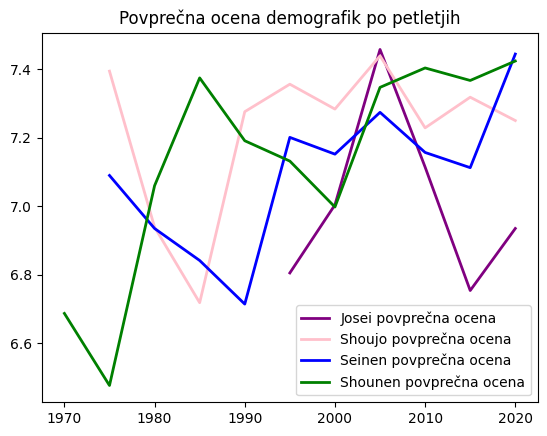

In [18]:
plot_demografike_ocene(df_josei5, df_shoujo5, df_seinen5, df_shounen5, "Povprečna ocena demografik po petletjih")


Iz splošnejšega grafa lahko v grobem vidimo, anime-ji katerih demografik so bili v nekem obdobju bolje ocenjeni kot drugi. Zanimivi so mi viški, saj so bile dalj časa povprečno najbolje ocenjene vsebine, ki ciljajo na občinstvo ženskega spola, Seinen pa se je iz sicer izjemno solidne povprečne ocene povzpel na višje relativno mesto glede na ostale demografike šele v zadnjih letih.

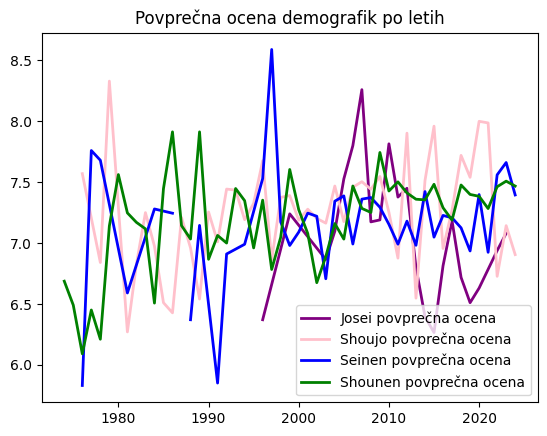

In [185]:
plot_demografike_ocene(df_josei, df_shoujo, df_seinen, df_shounen, "Povprečna ocena demografik po letih")

V bolj podrobnem grafu lahko vidimo, da ocene pravzaprav nihajo okoli povprečne ocene približno 7, spodaj pa sem poiskala nekatere ekstremne točke, izmed katerih romatičnih dram in komedij sicer ne poznam, Seinen pa je svoj prvi in največji višek letne povprečne ocene dosegel konec 90ih z Inital D in predvsem z Berserk.

In [186]:
VSI_ANIME[(VSI_ANIME["demografika"] == "Shoujo") & (VSI_ANIME["leto premiere"] <= 1983) & (VSI_ANIME["ocena"] > 8)]

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
338,Versailles no Bara,40,fall,1979,Manga,24,8.33,100485,Shoujo,"['Historical', 'Military']","['Drama', 'Romance']",['Tokyo Movie Shinsha']


In [187]:
VSI_ANIME[(VSI_ANIME["demografika"] == "Josei") & (VSI_ANIME["leto premiere"] < 2010) & (VSI_ANIME["ocena"] > 8)]

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
1142,Hachimitsu to Clover II,12,summer,2006,Manga,23,8.19,107769,Josei,"['Adult Cast', 'Love Polygon', 'Visual Arts']","['Drama', 'Romance']",['J.C.Staff']
1698,Nodame Cantabile,23,winter,2007,Manga,22,8.26,317202,Josei,"['Adult Cast', 'Music']","['Comedy', 'Romance']",['J.C.Staff']
4477,Nodame Cantabile: Paris-hen,11,fall,2008,Manga,23,8.13,125761,Josei,"['Adult Cast', 'Music']","['Comedy', 'Romance']",['J.C.Staff']


In [188]:
VSI_ANIME[(VSI_ANIME["demografika"] == "Seinen") & (VSI_ANIME["leto premiere"] < 1999) & (VSI_ANIME["ocena"] > 8)]

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
1453,Maison Ikkoku,96,spring,1986,Manga,25,8.19,74453,Seinen,['Adult Cast'],"['Comedy', 'Drama', 'Romance']",['Studio Deen']
33,Kenpuu Denki Berserk,25,fall,1997,Manga,23,8.59,672623,Seinen,"['Gore', 'Military']","['Action', 'Adventure', 'Drama', 'Fantasy', 'H...",['OLM']
185,Initial D First Stage,26,spring,1998,Manga,25,8.35,390370,Seinen,['Racing'],"['Action', 'Drama']",[]


Podobno funkcijo sem napisala za izris skupnih članov po letih posameznih demografik v istem grafu.

In [19]:
def plot_demografike_clani(dfjosei, dfshoujo, dfseinen, dfshounen, naslov):
    plt.plot(
        dfjosei.index, 'Josei člani', data=dfjosei,
        color='purple',
        linewidth=2
    )

    plt.plot(
        dfshoujo.index, 'Shoujo člani', data=dfshoujo,
        color='pink',
        linewidth=2
    )

    plt.plot(
        dfseinen.index, 'Seinen člani', data=dfseinen,
        color='blue',
        linewidth=2
    )

    plt.plot(
        dfshounen.index, 'Shounen člani', data=dfshounen,
        color='green',
        linewidth=2
    )

    plt.legend()
    plt.title(naslov)
    plt.show()

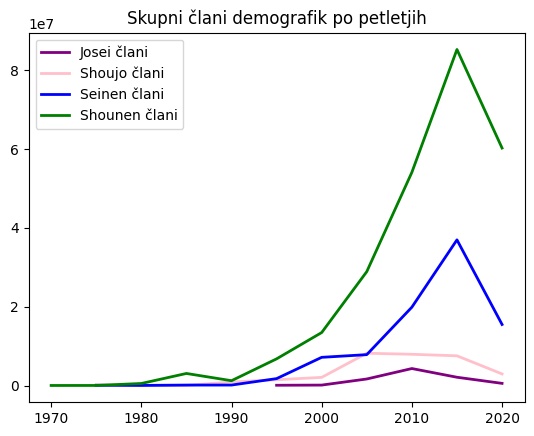

In [63]:
plot_demografike_clani(df_josei5, df_shoujo5, df_seinen5, df_shounen5, "Skupni člani demografik po petletjih")

Zgornji graf nam lepo prikaže splošen trend popularnosti oz. množičnosti posameznih demografik, spodnji nam pa kot za zanimivost prikaže še podatke po posameznih letih.

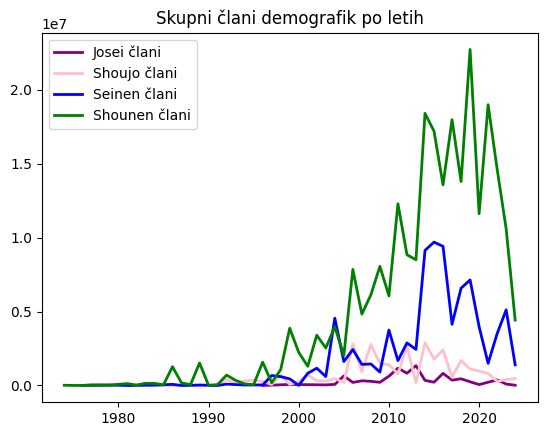

In [65]:
plot_demografike_clani(df_josei, df_shoujo, df_seinen, df_shounen, "Skupni člani demografik po letih")

### Viri

Sledi ogled uporabljenih virov za TV-adptacije po letih.

<Axes: title={'center': 'Število vnosov glede na vir po petletjih'}, xlabel='petletja'>

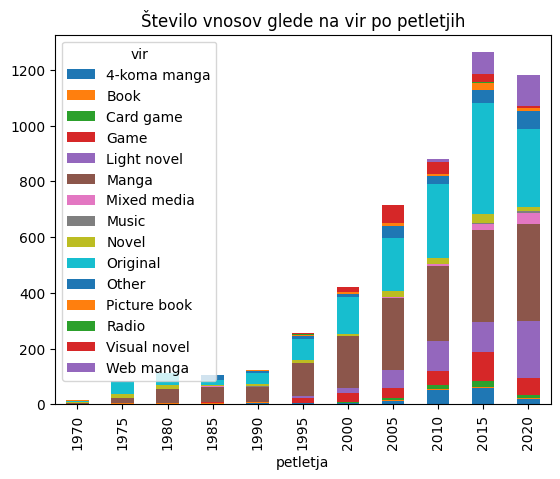

In [13]:
petletni_podatki_viri = pd.crosstab(
    index = podtabela_po_letih["petletja"],
    columns = podtabela_po_letih["vir"]
)
petletni_podatki_viri.plot(kind = "bar", stacked = True, title="Število vnosov glede na vir po petletjih")

In [50]:
podtabela_po_letih.groupby("vir").size().sort_values()

vir
Radio              5
Music             16
Book              36
Card game         49
Picture book      71
                ... 
Other            235
Game             311
Light novel      512
Original        1490
Manga           1689
Length: 15, dtype: int64

Že iz grafa je razvidno, da sta daleč najpopularnejša vira manga in "Original" (anime-ji, ki niso TV-adaptacija že napisane zgodbe, ampak so napisani kot izviren anime). Vidimo lahko tudi, kako so se nekateri viri pojavili oz. razvili šele nedavno, npr. Web manga, ter kako sta bila zastopana še dva zelo popularna vira: Game in Light novel. Adaptavije video iger so dosegle dosedanji višek priljubljenosti v letih med 2005 in 2015, Light Novel pa se je začel pojavljati šele v poznih devetdesetih, v zadnjem petletju pa je tretji najbolj zastopan.

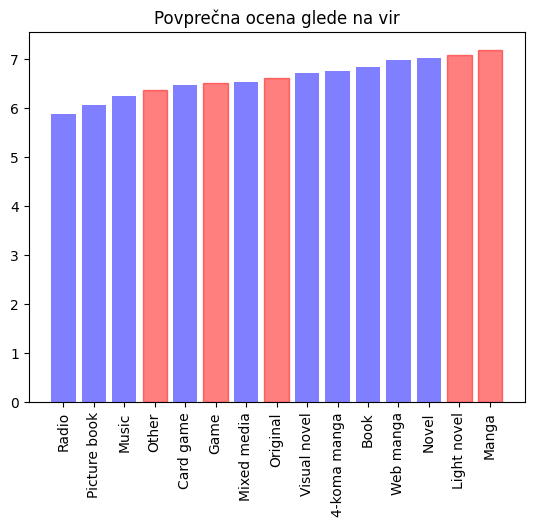

In [14]:
df_viri = pd.DataFrame({"povpr_o": podtabela_po_letih.groupby("vir")["ocena"].mean().sort_values()})

def plot_color_viri(data, target):
    bars = plt.bar(x=data.index, height=data.povpr_o, color='blue', alpha=0.5)
    for idx, word in enumerate(data.index):
        if word in target:
            bars[idx].set_color(c='red')
    plt.xticks(rotation = 90)
    plt.title("Povprečna ocena glede na vir")

popularni_viri = ["Manga", "Original", "Light novel", "Game", "Other"]

plot_color_viri(df_viri, popularni_viri)

V zgornjem grafu povprečnih ocen posameznega vira TV-adaptacije sem rdeče pobarvala najpopularnejših 5 virov, torej virov, ki so se zgoraj izkazali za tiste, ki so se jih studii v zadnjih 50 letih največkrat poslužili pri ustvarjanju anime-jev. Vidimo, da sta Manga in Light novel tudi najbolje ocenjena, kar pa ne velja npr. za Original in Game anime serije, ki imajo precej nižjo oceno.

## Analiza žanrov

Za analizo žanrov in anime-jev glede na žanr sem najprej združila povezovalno tabelo žanrov s tabelo vseh anime-jev, da žanri niso več seznami žanrov posamezne serije, ki so zdaj hranjeni v obliki niza, ampak ima vsak anime dodane vse njegove žanre; vsakega posebej v še enem stolpcu tabele.

In [15]:
zanri_anime = pd.merge(ZANRI, VSI_ANIME, left_on="id", right_on="id")

Sledita grafa povprečne ocene in skupnega števila članov anime-jev istega žanra.

<Axes: title={'center': 'Povprečna ocena po žanrih'}, xlabel='zanr'>

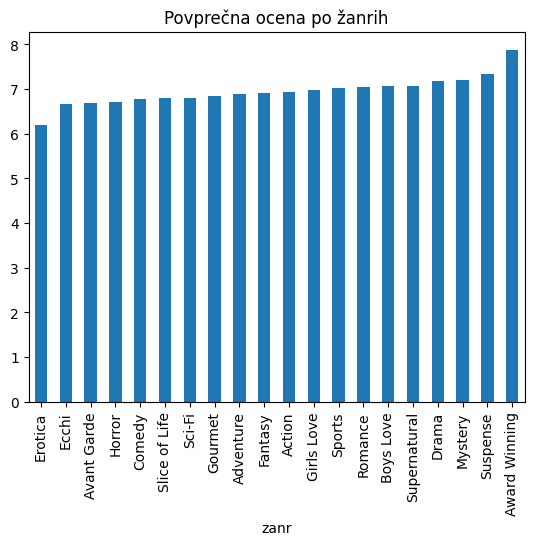

In [23]:
zanri_anime.groupby("zanr")["ocena"].mean().sort_values().plot.bar(title="Povprečna ocena po žanrih")

In [16]:
zanri_najbolje_ocenjeni = set(zanri_anime.groupby("zanr")["ocena"].mean().sort_values(ascending=False).head(5).index.tolist())
print(zanri_najbolje_ocenjeni)

{'Mystery', 'Suspense', 'Award Winning', 'Drama', 'Supernatural'}


<Axes: title={'center': 'Skupni člani po žanrih'}, xlabel='zanr'>

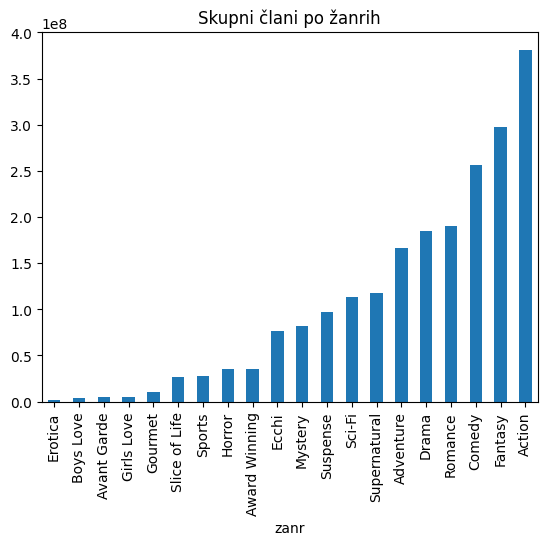

In [27]:
zanri_anime.groupby("zanr")["člani"].sum().sort_values().plot.bar(title="Skupni člani po žanrih")

In [17]:
zanri_najpopularnejsi = set(zanri_anime.groupby("zanr")["člani"].sum().sort_values(ascending=False).head(5).index.tolist())
print(zanri_najpopularnejsi)

{'Fantasy', 'Comedy', 'Drama', 'Romance', 'Action'}


Ker lahko vidimo, da prvih nekaj mest obeh grafov zasedajo zelo različni žanri, sem ustvarila še en graf skupnega števila članov anime-jev posameznega žanra, kjer so drugače obarvani stolpci petih povprečno najbolje ocenjenih žanrov.

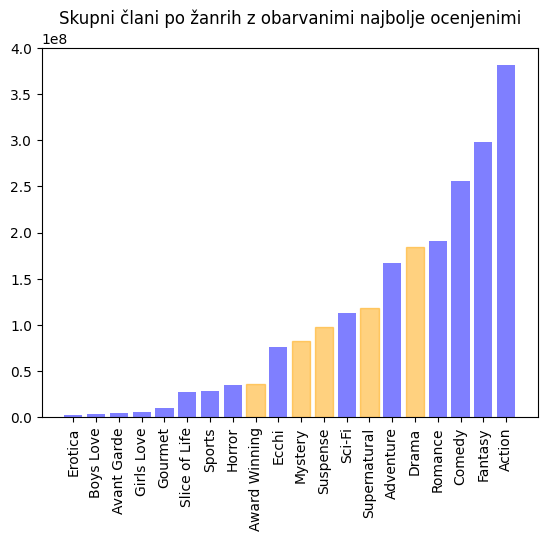

In [18]:
df_zanri_clani = pd.DataFrame({"clani": zanri_anime.groupby("zanr")["člani"].sum().sort_values()})
bars = plt.bar(x=df_zanri_clani.index, height=df_zanri_clani.clani, color='blue', alpha=0.5)
for idx, zanr in enumerate(df_zanri_clani.index):
    if zanr in zanri_najbolje_ocenjeni:
        bars[idx].set_color(c="orange")
plt.xticks(rotation=90)
plt.title("Skupni člani po žanrih z obarvanimi najbolje ocenjenimi")
plt.show()


V povprečju najbolje ocenjeni anime-ji sodijo med žanre Award Winning, Suspense, Mystery, Drama in Supernatural, vendar teh anime-jev ni veliko in niso zelo razširjeni, z izjemo dram. Najpopularnejši žanri so Action, Fantasy, Comedy, Romance in Drama. Drama torej zanimivo edina sodi v vrha obeh lestvic.

Sledi še primerjava žanrov po številu anime-jev, ki so žanru pripisani.

<Axes: title={'center': 'Število anime-jev posameznih žanrov'}, xlabel='zanr'>

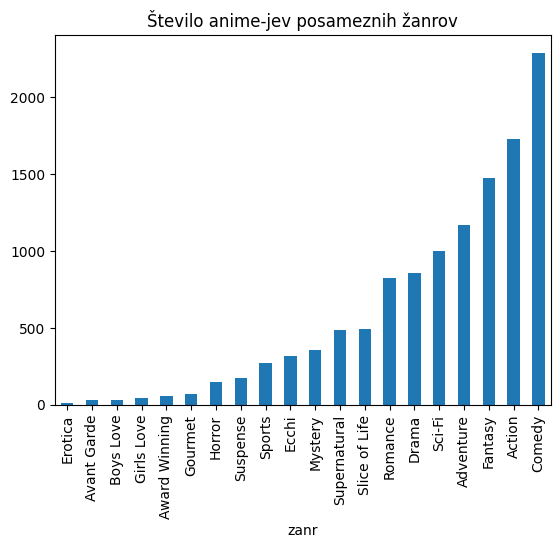

In [32]:
zanri_anime.groupby("zanr").size().sort_values().plot.bar(title="Število anime-jev posameznih žanrov")

V tem grafu pa sem želela vizualizirati še, kam sodijo žanri, ki se pojavijo med najboljšimi petimi glede na povprečno oceno in število članov. Tako so v spodnjem grafu skupnega števila naslovov po žanrih posebej obarvani žanri, ki sodijo med povprečno najbolje ocenjene (rumena), najbolj popularne (rjavo rdeča) oz. v obe kategoriji (vijolična), ostali so sivi. Opazimo lahko podoben pojav kot na zadnjem obarvanem grafu, hkrati pa vidimo, da je anime-jev, ki pripadajo žanrom z največ člani, pravzaprav tudi številčno največ.

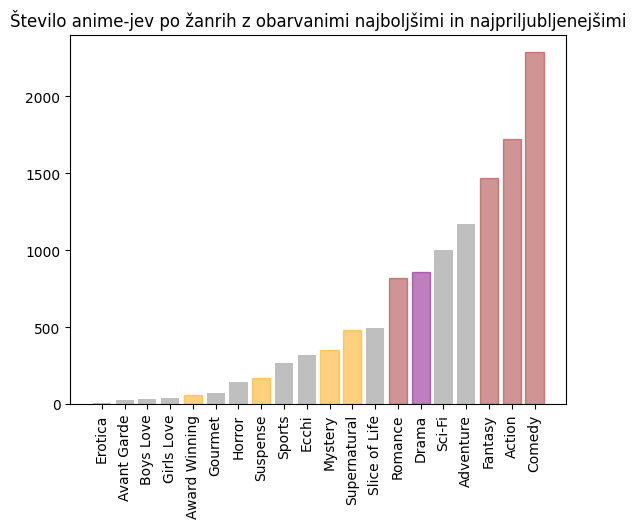

In [19]:
df_zanri_stevilo = pd.DataFrame({"stevilo": zanri_anime.groupby("zanr").size().sort_values()})
bars = plt.bar(x=df_zanri_stevilo.index, height=df_zanri_stevilo.stevilo, color='grey', alpha=0.5)
for idx, zanr in enumerate(df_zanri_stevilo.index):
    if zanr in zanri_najbolje_ocenjeni.intersection(zanri_najpopularnejsi):
        bars[idx].set_color(c="purple")
    elif zanr in zanri_najbolje_ocenjeni:
        bars[idx].set_color(c="orange")
    elif zanr in zanri_najpopularnejsi:
        bars[idx].set_color(c="brown")
plt.xticks(rotation=90)
plt.title("Število anime-jev po žanrih z obarvanimi najboljšimi in najpriljubljenejšimi")
plt.show()

Želela sem primerjati zadnji dve kategoriji po žanrih v istem grafu, ki je sicer primerem kvečjemu za približno oceno, vendar spodaj lahko dobimo vtis, npr. kako imajo sicer komedije zelo veliko članov, a jih je tudi največ, in imajo akcije in fantazijski anime-ji veliko večje razmerje med številom vseh članov in naslovov kot komedije. Vidimo lahko torej, kje se pojavljajo večje in manjše razlike med stolpcema seštevka vnosov in seštevka članov.

               število  člani * 10**5
zanr                                 
Action            1724     3813.13437
Adventure         1168     1665.04875
Avant Garde         28       47.03772
Award Winning       57      355.27962
Boys Love           33       36.46838
...                ...            ...
Sci-Fi            1001     1130.53098
Slice of Life      494      267.51663
Sports             269      280.74805
Supernatural       482     1177.59667
Suspense           172      973.90527

[20 rows x 2 columns]


<Axes: title={'center': 'Žanri s številom vnosov, članov in povprečno oceno'}, xlabel='zanr'>

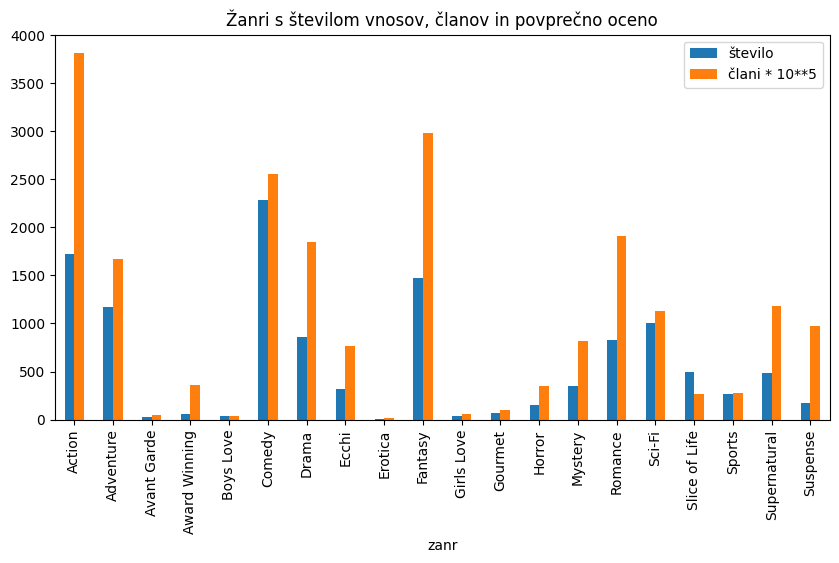

In [20]:
df_zanri = pd.DataFrame({"število": zanri_anime.groupby("zanr").size(),
                         "člani * 10**5": zanri_anime.groupby("zanr")["člani"].sum() / 100000})

print(df_zanri)

df_zanri.plot(kind = "bar", stacked = False, figsize=(10, 5), title="Žanri s številom vnosov, članov in povprečno oceno")

V nadaljevanju sem povezovala žanre in demografike; zanimalo me je na primer, kakšni so trendi žanrov v posameznih demografikah in v kakšnem razmerju žanr zastopa različne demografike. V spodnjem grafu lahko opazujemo število anime-jev posameznega žanra, ki so namenjeni različnim starostnim skupinam.

<Axes: title={'center': 'Število vnosov demografik po žanrih'}, ylabel='zanr'>

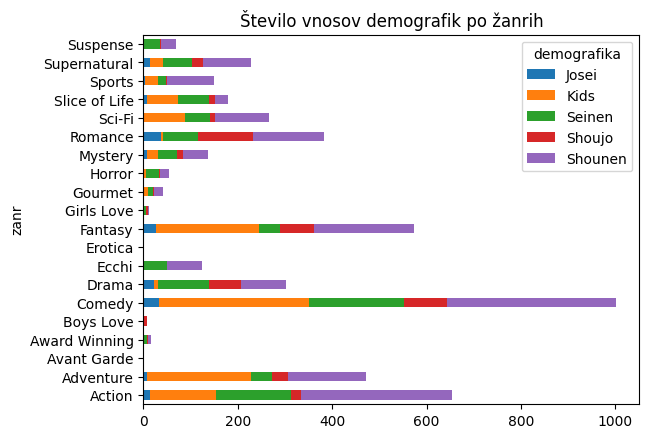

In [21]:
podtabela_zanri_demo = zanri_anime.copy()
podtabela_zanri_demo.drop(index=podtabela_zanri_demo[podtabela_zanri_demo['demografika'] == 'NG'].index, inplace=True)

ct_zanri_demo = pd.crosstab(
    index = podtabela_zanri_demo["zanr"],
    columns = podtabela_zanri_demo["demografika"]
)
ct_zanri_demo.plot(kind = "barh", stacked = True, title="Število vnosov demografik po žanrih")

Vidimo lahko med drugim, kako razširjena sta Shounen in Kids, predvsem pri najpopularnejših žanrih - komedija, na primer, pa je precej enakomerno razporejena med demografike. Za boljšo predstavo o deležih pa je spodaj graf, ki zgornje podatke predstavi v procentih. 

<Axes: title={'center': 'Delež števila vnosov demografik po žanrih'}, ylabel='zanr'>

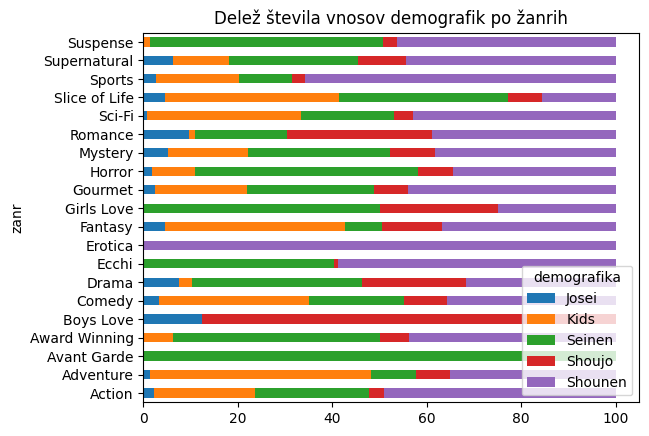

In [24]:
df_zanri_demo = pd.DataFrame(ct_zanri_demo)

plotdata = df_zanri_demo.div(df_zanri_demo.sum(axis=1), axis=0) * 100

plotdata.plot(kind="barh", stacked="True", title="Delež števila vnosov demografik po žanrih")

V zgornjem grafu izstopajo predvsem žanri, ki pretežno ciljajo zgolj na eno ali dve demografiki. Taki so: Girls Love, ki cilja pretežno na mlade moške in fante; Boys Love, ki cilja na mlada dekleta in tudi odrasle ženske; Erotica in Ecchi, katerih ciljno občinstvo so predvsem mladi fantje, pa tudi mladi moški; Avant Garde, ki je povsem Seinen. Ostale zanimivosti pa prepuščam vam.

Sledi še razpršitveni graf pojavljanja posameznih žanrov glede na leto premiere, iz katerega lahko približno vidimo, kateri žanri so bili nekako vseprisotni in kateri so se razvili oz. uveljavili šele v sodobnejšem času. Med slednje sodijo npr. vsi zgoraj omenjeni žanri in pa še npr. bolj specifična Gourmet in Suspense.

<Axes: xlabel='leto premiere', ylabel='zanr'>

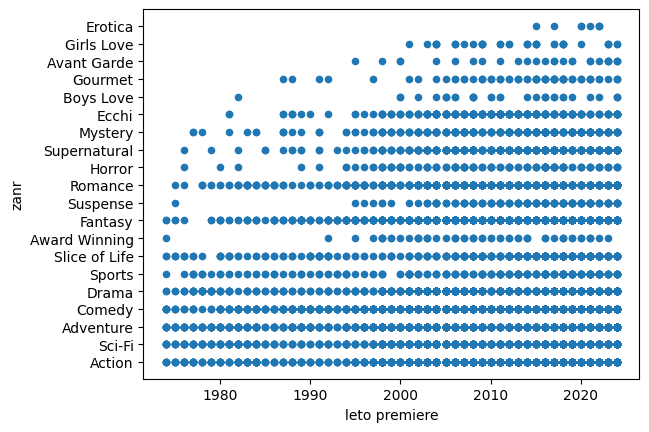

In [25]:
zanri_anime.plot.scatter(x="leto premiere", y="zanr")

## Primerjava podatkov o anime studiih

V tem razdelku sem se posvetila studiom, ki ustvarjajo anime-je, zato sem najprej prefiltrirala naslove, ki podatka o studiu nimajo, ter naredila tabelo, ki povezuje studie s številom pripadajočih naslovov glede na žanr. 

In [33]:
filter_studii = zanri_anime["studii"] != "[]"
zanri_studii = zanri_anime[filter_studii]

ct_zanri_studii = pd.crosstab(
    index = zanri_studii["studii"],
    columns = zanri_studii["zanr"]
)

df_zanri_studii = pd.DataFrame(ct_zanri_studii)
df_zanri_studii["skupna"] = zanri_studii.groupby("studii").size()
df_zanri_studii = df_zanri_studii.sort_values("skupna", ascending=False)
najvecji_studii = df_zanri_studii.head(20)
najvecji_studii

zanr,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,Fantasy,...,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,skupna
studii,,,,,,,,,,,,,,,,,,,,,
['Toei Animation'],93,70,1,0,1,94,32,2,0,91,...,2,8,15,27,50,11,16,14,2,529
['Sunrise'],112,52,0,9,0,42,40,0,0,27,...,2,1,12,18,108,10,4,7,4,449
['J.C.Staff'],58,40,0,1,4,70,40,22,0,71,...,7,5,13,50,27,8,3,19,7,446
['Studio Deen'],55,34,0,0,11,74,37,11,0,51,...,1,12,20,24,21,14,3,30,7,411
['Madhouse'],58,41,5,6,1,47,54,10,0,36,...,0,10,18,23,36,7,10,20,21,404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
['SILVER LINK.'],17,4,1,0,0,30,4,10,0,20,...,1,1,3,19,5,8,1,8,1,134
['Doga Kobo'],9,3,0,2,0,38,8,6,0,13,...,1,0,4,13,2,7,2,8,0,120
['Satelight'],23,11,0,2,1,13,8,1,0,15,...,0,0,1,11,25,1,1,1,1,115


<Axes: title={'center': 'Zastopanost žanrov pri največjih studiih'}, ylabel='število vnosov'>

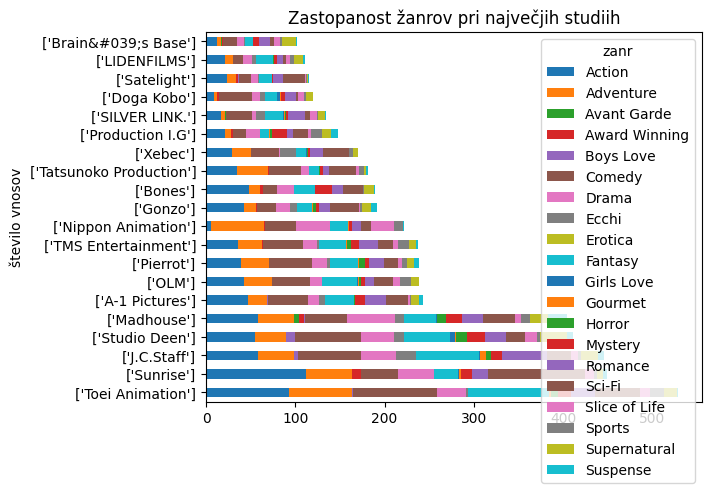

In [35]:
najvecji_studii.drop('skupna', axis=1).plot(kind="barh", stacked=True, title="Zastopanost žanrov pri največjih studiih", ylabel="število vnosov")

Za 20 studiev, ki jim skupno priprada največ vnosov v zgornji tabeli (en anime lahko sodi v več žanrov, zato to ni enako številu ustvarjenih naslovov), sem zgoraj naredila stolpični diagram, kjer lahko vidimo, na katere žanre se osredotočajo največji studii. Seveda se številčno največkrat pojavljajo žanri, ki so tako ali tako najbolj razširjeni. Kljub temu pa npr. nekaterih žanrov pri spodnjih studiih skorajda ne najdemo (bolj specifičnih), medtem ko večino dela teh studiev lahko razvrstimo med "glavnih" nekaj žanrov, kot so Action, Adventure, Comedy in Fantasy, z večjo izjemo npr. studia Sunrise, ki se bolj posveča Sci-Fi žanru, kot Fantasy. Predvsem vodilni Toei Animation je precej enoličen v izbiri žanrov; v nižje uvrščenih se namreč zdi, da je enakomerneje zastopanih več različnih žanrov.

Sledita primerjavi studiev po povprečni oceni, ki jo dosegajo ustvarjeni anime-ji, in po seštevku članov vseh anime-jev posameznega studia.

<Axes: title={'center': 'Povprečna ocena po studiih'}, ylabel='studii'>

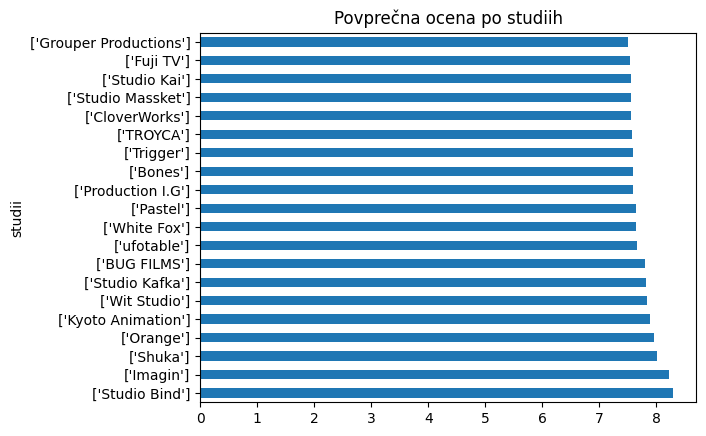

In [36]:
VSI_ANIME.groupby("studii")["ocena"].mean().sort_values(ascending=False).head(20).plot.barh(title="Povprečna ocena po studiih")

<Axes: title={'center': 'Skupno število članov anime-jev po studiih'}, ylabel='studii'>

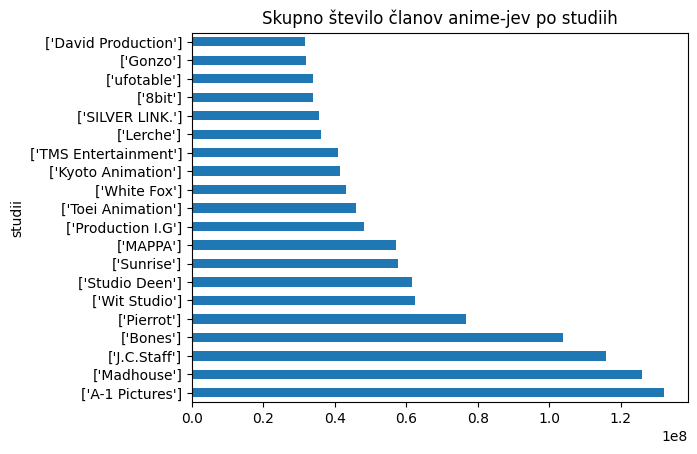

In [37]:
zanri_studii.groupby("studii")["člani"].sum().sort_values(ascending=False).head(20).plot.barh(title="Skupno število članov anime-jev po studiih")

Ker me je zanimalo, kam se uvrščajo studii, katerih naslovi sodijo med 20 najboljših po oceni oz. razširjenosti, sem si najprej ogledala, kateri studii se lahko "pohvalijo" s temi anime-ji.

In [42]:
najpopularnejsih20 = najpopularnejsi.head(20)
najboljsih20 = najboljsi.head(20)

<Axes: title={'center': 'Število anime-jev izmed najpopularnejših 20 po studiih'}, xlabel='število naslovov', ylabel='studii'>

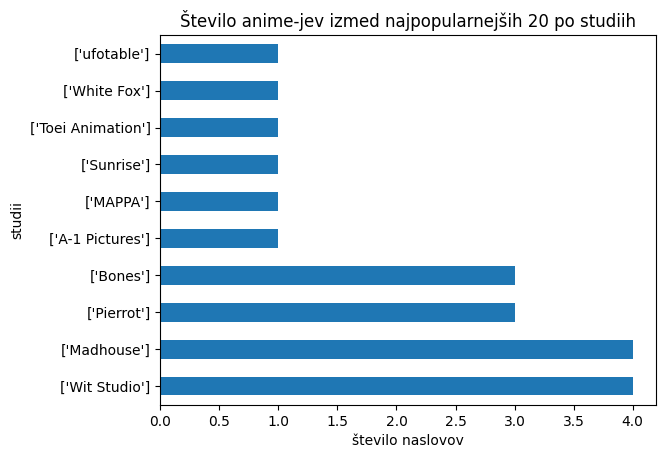

In [46]:
najpopularnejsih20.groupby("studii").size().sort_values(ascending=False).plot.barh(title="Število anime-jev izmed najpopularnejših 20 po studiih", xlabel="število naslovov")

<Axes: title={'center': 'Število anime-jev izmed najbolje ocenjenih 20 po studiih'}, xlabel='število naslovov', ylabel='studii'>

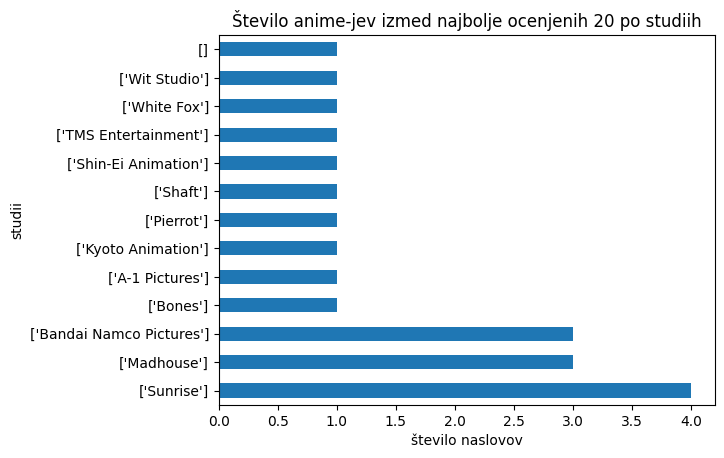

In [47]:
najboljsih20.groupby("studii").size().sort_values(ascending=False).plot.barh(title="Število anime-jev izmed najbolje ocenjenih 20 po studiih", xlabel="število naslovov")

Da bi lahko te podatke primerjala z zgornjimi in jih ilustrirala na istem grafu, sem ustvarila nov DataFrame objekt in funkcijo, ki v prejšnjih stolpičnih diagramih rjavo rdeče obarva studie, ki sodijo med proizvjalce 20 najbolje ocenjenih anime-jev, rumeno tiste, ki so ustvarili 20 najpopularnejših anime-jev, in vijolično studie, ki sodijo v obe kategoriji.

In [49]:
studii_najpopularnejsi = set(najpopularnejsih20["studii"].tolist())
studii_najboljsi = set(najboljsih20["studii"].tolist())
studii_najnaj = studii_najboljsi.intersection(studii_najpopularnejsi)

df_studii = pd.DataFrame({
    "clani": zanri_studii.groupby("studii")["člani"].sum(),
    "povprecna_ocena": zanri_studii.groupby("studii")["ocena"].mean(),
    "stevilo_anime_jev": zanri_studii.groupby("studii").size()
})

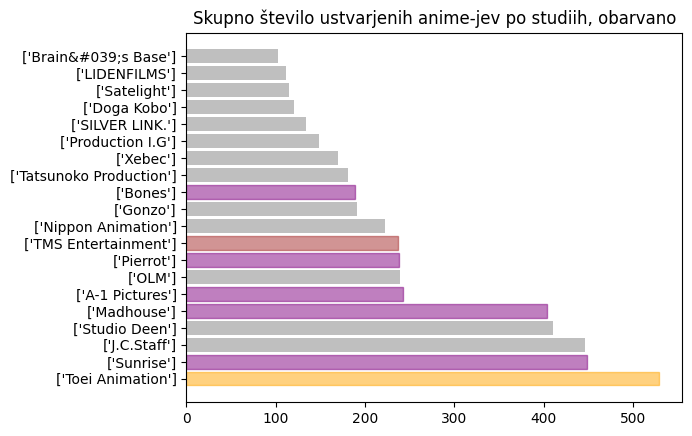

In [57]:
def plot_studii_stevilo(data, target_pop, target_bolj, target_najnaj, naslov):
    data = data.sort_values("stevilo_anime_jev", ascending=False).head(20)
    bars = plt.barh(y=data.index, width=data.stevilo_anime_jev, color='grey', alpha=0.5)
    for idx, studio in enumerate(data.index):
        if studio in target_najnaj:
            bars[idx].set_color(c='purple')
        elif studio in target_bolj:
            bars[idx].set_color(c="brown")
        elif studio in target_pop:
            bars[idx].set_color(c="orange")
    plt.title(naslov)

plot_studii_stevilo(df_studii, studii_najpopularnejsi, studii_najboljsi, studii_najnaj, "Skupno število ustvarjenih anime-jev po studiih, obarvano")

Vidimo lahko, da je izmed studiev, katerih anime-ji so najvišje uvrščeni, 7 takih, ki se uvrščajo na seznam 20 največjih glede na število ustvarjenih anime-jev. Toei Animation, ki je na prvem mestu, ima en naslov med najpopularnejšimi 20, medtem ko se npr. Wit Studio s štirimi takimi naslovi v zgornjem grafu sploh ne pojavi in je torej precej manjši, a so njegove kreacije dosegle množice ljudi. Studio Sunrise, ki je povprečno najbolje ocenjen, pa je zanimivo tudi ogromen studio in je očitno ustvaril veliko dobro sprejetih naslovov.

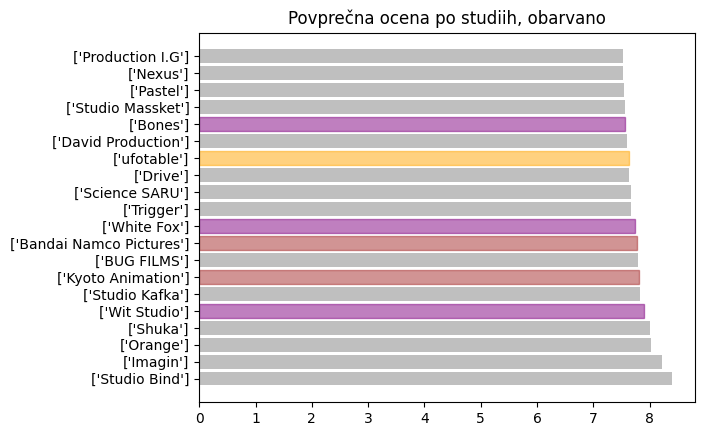

In [58]:
def plot_studii_ocena(data, target_pop, target_bolj, target_najnaj, naslov):
    data = data.sort_values("povprecna_ocena", ascending=False).head(20)
    bars = plt.barh(y=data.index, width=data.povprecna_ocena, color='grey', alpha=0.5)
    for idx, studio in enumerate(data.index):
        if studio in target_najnaj:
            bars[idx].set_color(c='purple')
        elif studio in target_bolj:
            bars[idx].set_color(c="brown")
        elif studio in target_pop:
            bars[idx].set_color(c="orange")
    plt.title(naslov)

plot_studii_ocena(df_studii, studii_najpopularnejsi, studii_najboljsi, studii_najnaj, "Povprečna ocena po studiih, obarvano")

V dvajseterico studiev s povprečno najbolje ocenjenimi izdelki sodi sicer še večina preostalih studiev, katerih anime-ji so najvišje uvrščeni po obeh kategorijah, ki se jima posvečam zadnjih nekaj odstavkov - npr. zgoraj omenjeni Wit Studio in drugi. Kljub temu pa štirje najbolje ocenjeni studii ne sodijo v nobeno izmed kategorij. Ker me je zanimalo, ali so ti studii torej proizvedli le nekaj naslovov, ki pa so bili dobro sprejeti, oziroma katere anime-je so ustvarili, sem si to podrobneje ogledala spodaj.

In [99]:
studio_bind = VSI_ANIME["studii"] == "['Studio Bind']"
seznam_bind_anime = (VSI_ANIME[studio_bind])["naslov"].tolist()
print("Studio Bind: ", seznam_bind_anime)

imagin = VSI_ANIME["studii"] == "['Imagin']"
seznam_imagin = (VSI_ANIME[imagin])["naslov"].tolist()
print("Imagin: ", seznam_imagin)

orange = VSI_ANIME["studii"] == "['Orange']"
seznam_orange = (VSI_ANIME[orange])["naslov"].tolist()
print("Orange: ", seznam_orange)

shuka = VSI_ANIME["studii"] == "['Shuka']"
seznam_shuka = (VSI_ANIME[shuka])["naslov"].tolist()
print("Shuka: ", seznam_shuka)

Studio Bind:  ['Mushoku Tensei: Isekai Ittara Honki Dasu', 'Mushoku Tensei: Isekai Ittara Honki Dasu Part 2', 'Oniichan wa Oshimai!', 'Mushoku Tensei II: Isekai Ittara Honki Dasu', 'Mushoku Tensei II: Isekai Ittara Honki Dasu Part 2']
Imagin:  ['Ookami to Koushinryou']
Orange:  ['Houseki no Kuni', 'Beastars', 'Beastars 2nd Season', 'Trigun Stampede']
Shuka:  ['Durarara!!x2 Shou', 'Durarara!!x2 Ten', 'Durarara!!x2 Ketsu', '91 Days', 'Natsume Yuujinchou Go', 'Natsume Yuujinchou Roku', 'Housekishou Richard-shi no Nazo Kantei', 'Yuzuki-san Chi no Yonkyoudai.', 'Natsume Yuujinchou Shichi']


Vidimo, da so ti štirje studii ustvarili npr. eno zelo uspešno franšizo in morda še kakšen naslov ob tem, kar je precej drugače kot nekateri ostali studii na zgornjih lesticah, zato sem spodaj podobne grafe izrisala še s filtrom, ali so studii ustvarili več ali manj kot 25 naslovov. Ti grafi so bili nekoliko bolj predvidljivi.

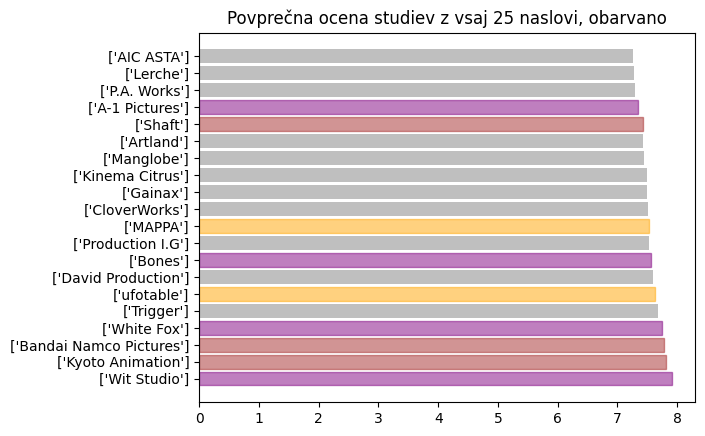

In [73]:
filter_vsaj_25 = df_studii.drop(index=df_studii[df_studii["stevilo_anime_jev"] < 25].index)

plot_studii_ocena(filter_vsaj_25, studii_najpopularnejsi, studii_najboljsi, studii_najnaj, "Povprečna ocena studiev z vsaj 25 naslovi, obarvano")

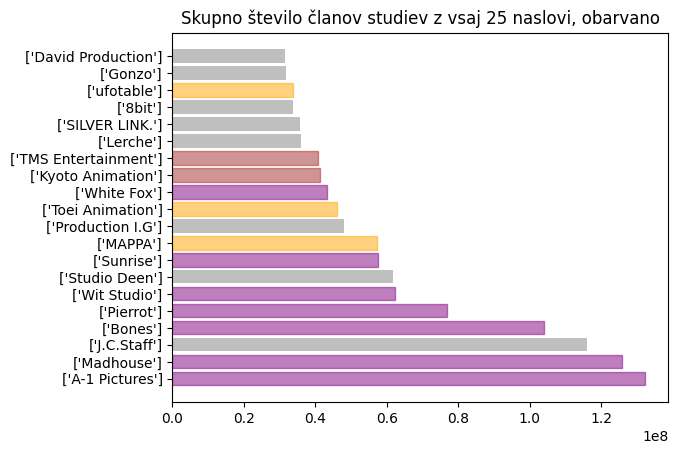

In [75]:
def plot_studii_clani(data, target_pop, target_bolj, target_najnaj, naslov):
    data = data.sort_values("clani", ascending=False).head(20)
    bars = plt.barh(y=data.index, width=data.clani, color='grey', alpha=0.5)
    for idx, studio in enumerate(data.index):
        if studio in target_najnaj:
            bars[idx].set_color(c='purple')
        elif studio in target_bolj:
            bars[idx].set_color(c="brown")
        elif studio in target_pop:
            bars[idx].set_color(c="orange")
    plt.title(naslov)

plot_studii_clani(filter_vsaj_25, studii_najpopularnejsi, studii_najboljsi, studii_najnaj, "Skupno število članov studiev z vsaj 25 naslovi, obarvano")

V zgornjem stolpičnem diagramu se sedaj pojavijo vsi studii, ki se uvrščajo med ustvarjalce najbolje ocenjenih oz. najbolj razširjenih anime-jev, z izjemo studiev Shin-Ei Animation, Shaft, ki imata en naslov med najbolje ocenjenih 20, in Bandai Namco Pictures, ki je ustvaril Gintamo.

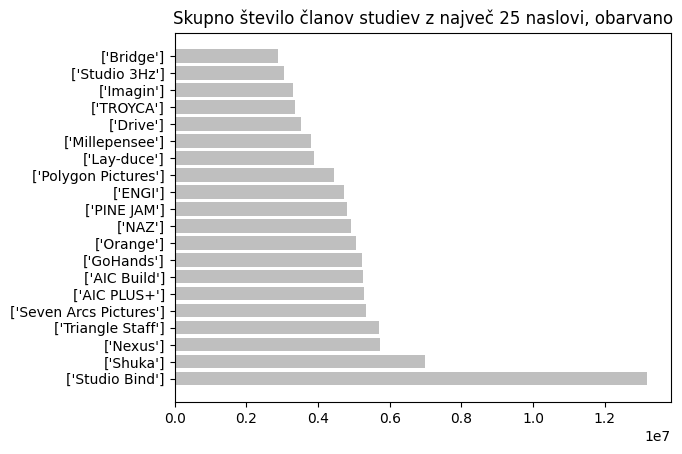

In [83]:
filter_max_25 = df_studii.drop(index=df_studii[df_studii["stevilo_anime_jev"] >= 25].index)

plot_studii_clani(filter_max_25, studii_najpopularnejsi, studii_najboljsi, studii_najnaj, "Skupno število članov studiev z največ 25 naslovi, obarvano")

Daleč na prvem mestu lestvice skupnega števila članov po studiih z največ 25 naslovi je Studio Bind, ki je ustvaril serijo Natsume's Book of Friends. Noben izmed popularnih manjših studiev pa nima svojega anime-ja uvrščenega med najbolje ocenjenih ali najpopularnejših 20.

## Liki in favoritizacije

Kot omenjeno že v uvodniku, za ta sklop nimam dovolj podatkov, tako da priporočam lasten zagon kode in interpretacijo podatkov v upanju, da bo zanimiva in boste izvedeli kaj, kar sem jaz želela ugotoviti v tem poglavju.

Najprej pa sem povezala povezovalno tabelo s tabelo podatkov o likih, nato pa še s tabelo iz CSV-tabele *anime.csv*. Za obdelavo sem izluščila le nekaj atributov.

In [85]:
za_like1 = pd.merge(LIKI, ANIME_LIKI, left_on="id_lika", right_on="id_lika")
za_like2 = pd.merge(za_like1, ANIME, left_on="id_anime", right_on="id")
za_like = za_like2[["id_lika", "ime", "favoritizacije_lika", "id_anime", "vloga", "naslov", "ocena", "člani", "favoritizacije", "demografika"]]
za_like

,id_lika,ime,favoritizacije_lika,id_anime,vloga,naslov,ocena,člani,favoritizacije,demografika
0,8827,Heidi,105,2225,Main,Alps no Shoujo Heidi,7.38,38916,333,NG
1,30308,Alm-Onji,34,2225,Supporting,Alps no Shoujo Heidi,7.38,38916,333,NG
2,17787,Clara Sesemann,14,2225,Supporting,Alps no Shoujo Heidi,7.38,38916,333,NG
3,8828,Peter,12,2225,Supporting,Alps no Shoujo Heidi,7.38,38916,333,NG
4,30307,Rottenmeier,2,2225,Supporting,Alps no Shoujo Heidi,7.38,38916,333,NG
...,...,...,...,...,...,...,...,...,...,...
395,185028,Tubby,0,3823,Supporting,Little Lulu to Chicchai Nakama,6.42,1097,1,Kids
396,159502,Alvin,0,3823,Supporting,Little Lulu to Chicchai Nakama,6.42,1097,1,Kids
397,123509,Annie,0,3823,Supporting,Little Lulu to Chicchai Nakama,6.42,1097,1,Kids
398,89595,Pucchi,0,3823,Supporting,Little Lulu to Chicchai Nakama,6.42,1097,1,Kids


V spodnjem grafu sem želela v grobem videti, koliko skupnih favoritizacij likov imajo najbolje ocenjeni anime-ji, dodala pa sem še število članov, ker se favoritizacije seveda ne merijo v povprečjih, kot npr. ocene, ampak so torej odvisne od števila ljudi, ki so serijo videli.

<Axes: title={'center': 'Primerjava števila favoritizacij likov s številom članom in povprečno oceno'}, xlabel='naslov'>

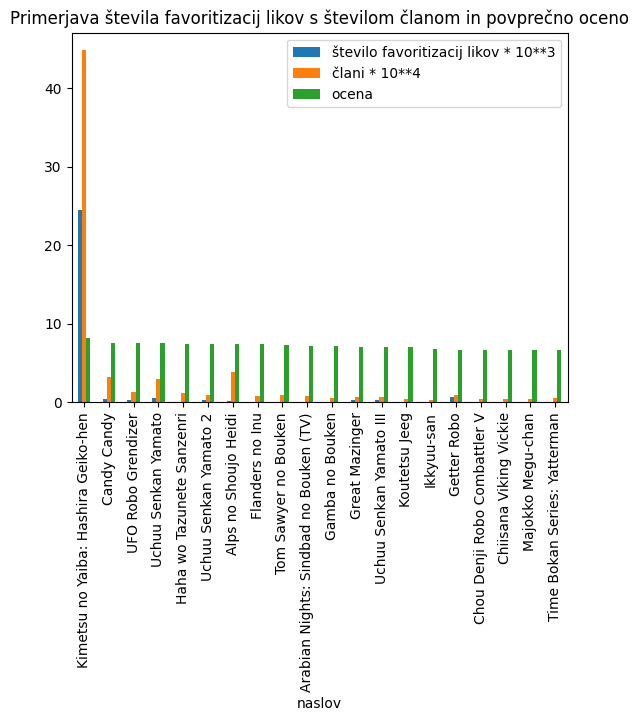

In [110]:
df_liki = pd.DataFrame({
    "število favoritizacij likov * 10**3": za_like.groupby("naslov")["favoritizacije_lika"].sum() / 1000,
    "člani * 10**4": za_like.groupby("naslov")["člani"].mean() / 10000,
    "ocena": za_like.groupby("naslov")["ocena"].mean(),
})

df_liki.sort_values("ocena", ascending=False).head(20).plot(kind="bar", stacked=False, title="Primerjava števila favoritizacij likov s številom članom in povprečno oceno")

Želela sem tudi videti, kako se število favoritizacij deli na favoritizacije glavnih in stranskih likov. Verjetno pa nimajo vsi anime-ji enakih kriterijev za definicijo glavne in stranskih oseb, saj je glavnih oseb lahko poljubno več kot ena.

In [111]:
filter_main = za_like["vloga"] == "Main"
liki_main = za_like[filter_main]
liki_supporting = za_like[~filter_main]

<Axes: title={'center': 'Primerjava favoritizacij glavnih in stranskih likov'}, xlabel='naslov'>

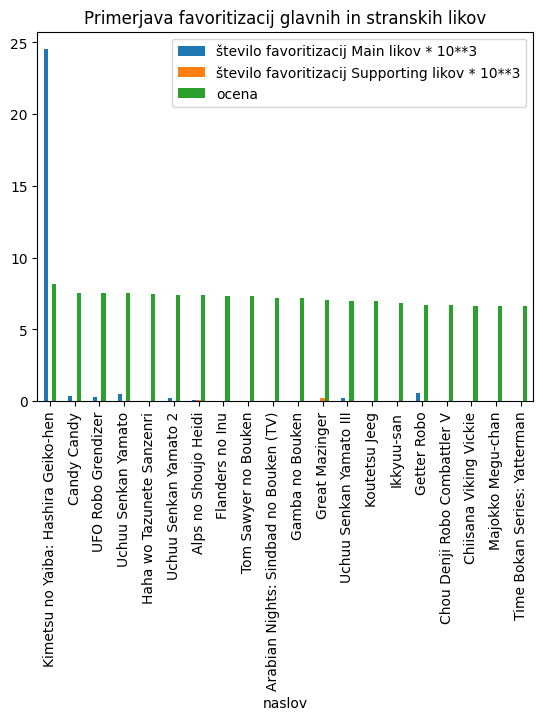

In [112]:
df_main_v_sup = pd.DataFrame({
    "število favoritizacij Main likov * 10**3": liki_main.groupby("naslov")["favoritizacije_lika"].sum() / 1000,
    "število favoritizacij Supporting likov * 10**3": liki_supporting.groupby("naslov")["favoritizacije_lika"].sum() / 1000,
    "ocena": za_like.groupby("naslov")["ocena"].mean(),
})

df_main_v_sup.sort_values("ocena", ascending=False).head(20).plot(kind="bar", stacked=False, title="Primerjava favoritizacij glavnih in stranskih likov")

Nato sem podoben graf kot zgoraj naredila še posebej za število favoritizacij glavnih in stranskih likov, vendar sem ga tokrat uredila po številu favoritizacij in ne povprečni oceni. Ocena in število članov ostajata za primerjavo.

<Axes: title={'center': 'Primerjava števila favoritizacij stranskih likov'}, xlabel='naslov'>

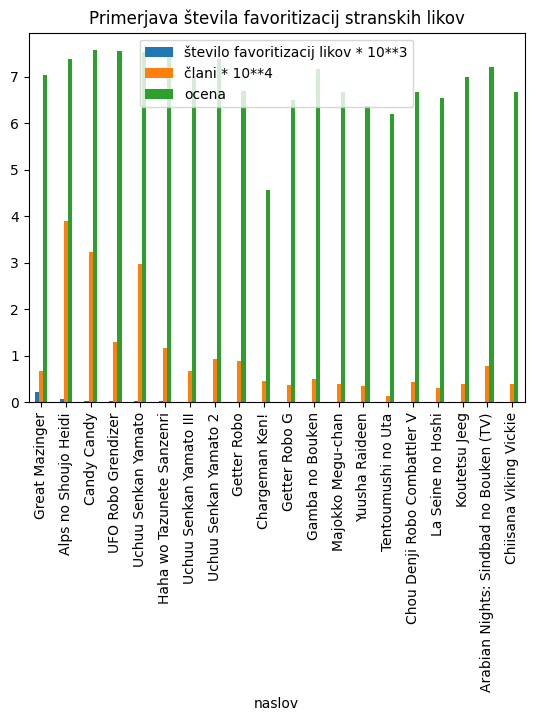

In [113]:
df_supporting = pd.DataFrame({
    "število favoritizacij likov * 10**3": liki_supporting.groupby("naslov")["favoritizacije_lika"].sum() / 1000,
    "člani * 10**4": liki_supporting.groupby("naslov")["člani"].mean() / 10000,
    "ocena": liki_supporting.groupby("naslov")["ocena"].mean(),
})

df_supporting.sort_values("število favoritizacij likov * 10**3", ascending=False).head(20).plot(kind="bar", stacked=False, title="Primerjava števila favoritizacij stranskih likov")

<Axes: title={'center': 'Primerjava števila favoritizacij glavnih likov'}, xlabel='naslov'>

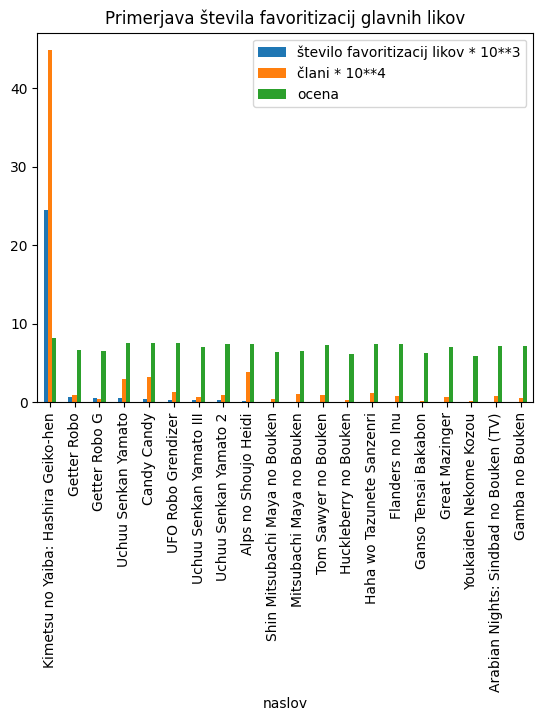

In [114]:
df_main = pd.DataFrame({
    "število favoritizacij likov * 10**3": liki_main.groupby("naslov")["favoritizacije_lika"].sum() / 1000,
    "člani * 10**4": liki_main.groupby("naslov")["člani"].mean() / 10000,
    "ocena": liki_main.groupby("naslov")["ocena"].mean(),
})

df_main.sort_values("število favoritizacij likov * 10**3", ascending=False).head(20).plot(kind="bar", stacked=False, title="Primerjava števila favoritizacij glavnih likov")

Če bi imela dovolj podatkov, bi bilo morda lahko zanimivo videti, kaj se zgodi.

## Franšize

Zadnji sklop analize podatkov s spletne strani myanimelist.net so franšize TV-serij. V tem poglavju bom torej združila anime-je tako, da bodo vsi povezani vnosi obravnavani kot celota. Tega sem se lotila s povezovanjem ustvarjenih tabel, iz katerih pa sem najprej opustila naslove, ki nimajo drugih povezanih vnosov in torej ne sodijo v franšizo. V tem sistemu se sicer lahko pojavi luknja, če ima anime t.i. "remake" ali pa zgolj kakšno epizodo posebej dodano kot "Special", vendar me to ne moti preveč. 

Spet sem lahko uporabila le tabelo *anime.csv*, zato so podatki okrnjeni in rezultatov ne bom niti preveč komentirala, saj niso reprezentativni.

In [116]:
fransize_anime = pd.merge(FRANSIZE, ANIME, left_on="id_anime", right_on="id")

df_fransize1 = pd.DataFrame(fransize_anime.groupby("id_fransize").size())
df_fransize1.drop(index=df_fransize1[df_fransize1[0] == 1].index, inplace=True)

samo_fransize = pd.merge(df_fransize1, fransize_anime, left_on="id_fransize", right_on="id_fransize")

ime_fransiz = samo_fransize[["id_fransize", "id_anime", "naslov"]].copy()
ime_fransiz.drop(index=ime_fransiz[ime_fransiz["id_fransize"] != ime_fransiz["id_anime"]].index, inplace=True)

samo_fransize1 = pd.merge(samo_fransize, ime_fransiz, left_on="id_fransize", right_on="id_fransize")
samo_fransize = samo_fransize1[["id_fransize", "naslov_y", "id_anime_x", "naslov_x", "ocena", "število epizod", "vir", "leto premiere", "dolzina epizode v minutah", "demografika", "člani"]]
samo_fransize 
# naslov_y bom obravnavala kot naslov fransize, za katerega pa sem vzela prvi anime, ki se je iz franšize 
# pojavil na seznamu in mu pripada id, ki sem ga razglasila za id_frasize med pridobivanjem podatkov.

,id_fransize,naslov_y,id_anime_x,naslov_x,ocena,število epizod,vir,leto premiere,dolzina epizode v minutah,demografika,člani
0,80,Kidou Senshi Gundam,85,Kidou Senshi Zeta Gundam,7.88,50,Original,1985,24,NG,77335
1,80,Kidou Senshi Gundam,80,Kidou Senshi Gundam,7.75,43,Original,1979,25,NG,136212
2,80,Kidou Senshi Gundam,86,Kidou Senshi Gundam ZZ,6.65,47,Original,1986,24,NG,44767
3,1425,Lupin III: Part II,1426,Lupin III: Part III,7.28,50,Manga,1984,24,Seinen,23249
4,1425,Lupin III: Part II,1425,Lupin III: Part II,7.76,155,Manga,1977,25,Seinen,35887
...,...,...,...,...,...,...,...,...,...,...,...
95,31898,Robocar Poli,32221,Robocar Poli 2,5.63,26,Original,2012,11,Kids,472
96,38070,Kkoma Bus Tayo,38071,Kkoma Bus Tayo 2,5.62,26,Original,2011,11,Kids,390
97,38070,Kkoma Bus Tayo,38070,Kkoma Bus Tayo,5.73,26,Original,2010,11,Kids,505
98,48221,Bubble Bubble Cook,48221,Bubble Bubble Cook,NaN,52,Original,2010,23,Kids,159


Ker me je v prejšnjem poglavju zanimalo tudi, koliko skupnih favoritizacij likov imajo franšize (in ne posamezni anime-ji), sem najprej ustvarila za graf, ki pa lahko služi le za grobo oceno, saj sem vzela povprečje skupnih favoritizacij likov anime-jev v franšizi, saj ti niso nujno enaki, ker se glavnih 10 likov lahko od sezone do sezone tudi spreminja.

<Axes: title={'center': 'Primerjava skupnih favoritizacij likov franšiz'}, xlabel='naslov_y'>

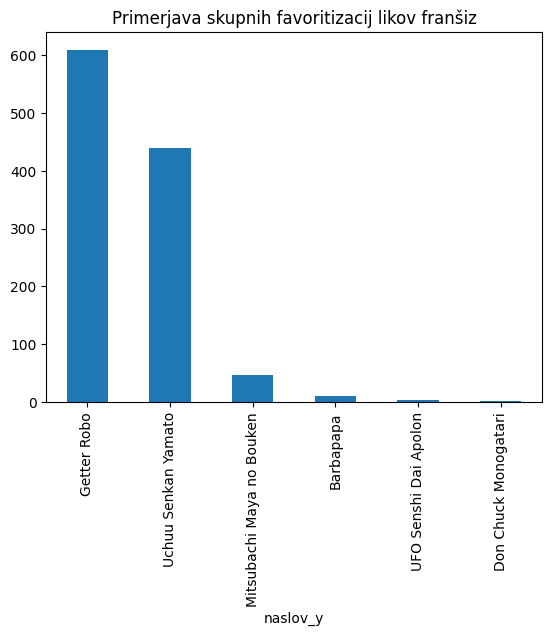

In [108]:
fransize_z_liki = pd.merge(samo_fransize1[["id_fransize", "naslov_y", "id_anime_x", "favoritizacije"]], za_like, left_on="id_anime_x", right_on="id_anime")

skupne_favoritizacije_likov = fransize_z_liki.groupby("id_anime")["favoritizacije_lika"].sum()

fransize_z_liki = pd.merge(fransize_z_liki, skupne_favoritizacije_likov, left_on="id_anime_x", right_on="id_anime")
# Skupne favoritizacije likov so v tej tabeli 'favoritiracije_lika_y'

fransize_z_liki.groupby("naslov_y")["favoritizacije_lika_y"].mean().sort_values(ascending=False).plot.bar(title="Primerjava skupnih favoritizacij likov franšiz")

V povezavi z zgornjim pa sem naredila tudi spodnji graf seštevkov favoritizacij anime-jev v posamezni franšizi, ker bi me z reprezentativnim vzorcem zanimalo, do kolikšne mere bi se vrha lestvic ujemala oz. razlikovala.

Kot zanimivost sem želela primerjati tudi franšize z največ skupnimi favoritizacijami vseh njenih delov z najboljšimi oz. najpopularnejšimi anime-ji iz začetka analize. Če je vam pridobilo vse potrebne spletne strani, si lahko to z nekaj brskanja "nazaj" ogledate sami.

<Axes: title={'center': 'Skupne favoritizacije franšiz'}, xlabel='naslov_y'>

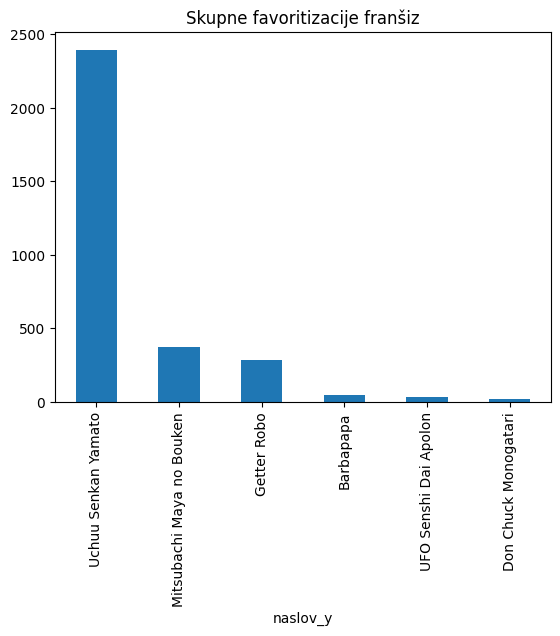

In [109]:
fransize_z_liki.groupby("naslov_y")["favoritizacije_y"].sum().sort_values(ascending=False).plot.bar(title="Skupne favoritizacije franšiz")

Za analizo franšiz samih pa sem najprej ustvarila preprost stolpični diagram najboljših povprečnih ocen vseh delov posameznih franšiz.

<Axes: title={'center': 'Povprečne ocene franšiz'}, xlabel='naslov_y'>

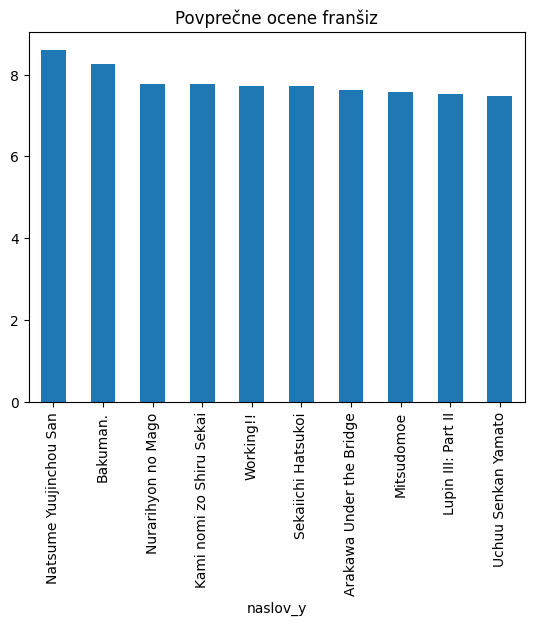

In [117]:
samo_fransize.groupby("naslov_y")["ocena"].mean().sort_values(ascending=False).head(10).plot.bar(title="Povprečne ocene franšiz")

Zanimala me je tudi korelacija med skupnim številom epizod posamezne franšize in njeno povprečno oceno; recimo, kako so ocenjene daljše zgodbe, med katere sodijo npr. pripradniki že omenjenega podžanra Long Action Shounen, v splošnem pa, kako je razpršeno razmerje teh dveh atributov.

<Axes: xlabel='skupno število epizod', ylabel='povprečna ocena'>

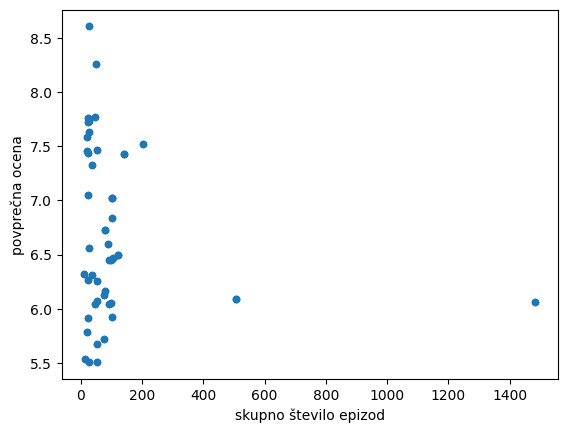

In [118]:
skupno_fransize = pd.DataFrame({
    "skupno število epizod": samo_fransize.groupby("naslov_y")["število epizod"].sum(),
    "povprečna ocena": samo_fransize.groupby("naslov_y")["ocena"].mean(),
    "skupni člani": samo_fransize.groupby("naslov_y")["člani"].sum()
    })

podatki_fransize = pd.merge(samo_fransize, skupno_fransize, left_on="naslov_y", right_on="naslov_y")
podatki_fransize.drop(index=podatki_fransize[podatki_fransize["povprečna ocena"].isna()].index, inplace=True)

podatki_fransize.plot.scatter(x="skupno število epizod", y="povprečna ocena")

Nazadnje sem skupno število epizod primerjala še s skupnim seštevkom članov vseh delov posamezne franšize.

<Axes: xlabel='skupno število epizod', ylabel='skupni člani'>

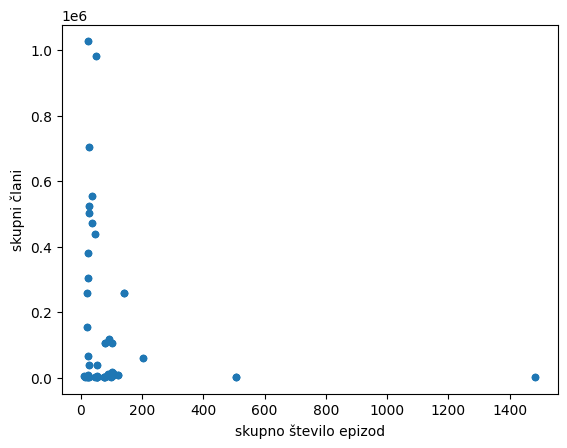

In [53]:
podatki_fransize.plot.scatter(x="skupno število epizod", y="skupni člani")